<a href="https://colab.research.google.com/github/lattarian/projeto_aplicado_iv/blob/main/projeto/cd_projeto_aplicado_IV_entrega_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <img src="https://raw.githubusercontent.com/scalabrinig/cdProjetoAplicadoIV/d093146488f56dfcf0ef286bcee8efe0e71b9c76/figuras/mackenzie_logo.jpg" width="25%" align="right"/>

# **PROJETO APLICADO IV - Ciência de Dados EaD - 2025/02**


# **Entrega 4**

---

# **Título do Projeto**
---

In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'Luis Fernando do Lago Attarian, 10089158' #@param {type:"string"}
Aluno2 = 'Kelly Graziely dos Santos Pena, 10416108' #@param {type:"string"}


# **Resumo**

Este projeto analisa a evolução da taxa de desocupação no Brasil entre 2012 e 2025, buscando responder ao problema de como crises econômicas, choques exógenos (como a pandemia de COVID-19) e períodos de recuperação afetam de forma persistente o mercado de trabalho e em que medida essas dinâmicas se alinham às metas do ODS 8, voltadas a trabalho decente e crescimento econômico. A relevância do estudo reside no fato de que o desemprego impacta diretamente renda, consumo, arrecadação e inclusão social, tornando indispensável uma leitura histórica e estrutural do indicador para subsidiar políticas públicas e decisões estratégicas. Metodologicamente, utiliza-se a série trimestral da PNAD Contínua (IBGE/SIDRA, tabela 4099) e técnicas de séries temporais, combinando análise exploratória (estatísticas descritivas e visualizações), decomposição STL (tendência, sazonalidade e resíduo) e diagnóstico ACF/PACF, com uso de modelos autorregressivos do tipo ARIMA para construir projeções exploratórias de curto prazo. Como produto, espera-se gerar um conjunto de painéis e indicadores interpretáveis — incluindo séries ajustadas sazonalmente, identificação de choques e comparação entre períodos críticos, capaz de apoiar a formulação e o monitoramento de políticas de emprego alinhadas à agenda do desenvolvimento sustentável.

# **Introdução**

A taxa de desocupação é um dos principais indicadores para compreender a dinâmica do mercado de trabalho e a estabilidade econômica do Brasil. Desde 2012, esse índice tem oscilado em resposta a crises, como a recessão de 2015–2016 e a pandemia de COVID-19, e a períodos de recuperação, como a expansão recente do emprego formal (IBGE, 2024; BRASIL, 2025). Em 2024, a taxa média de 6,6% atingiu o menor nível da série histórica, e em 2025 o índice recuou ainda mais para 5,8%, sinalizando avanços consistentes alinhados ao Objetivo de Desenvolvimento Sustentável 8 (ODS 8), que busca promover trabalho decente e crescimento econômico (NAÇÕES UNIDAS, 2023).

O projeto utiliza como base de dados a Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD Contínua), realizada pelo IBGE, que disponibiliza a taxa de desocupação com periodicidade trimestral, abrangendo todas as Unidades da Federação e permitindo comparações regionais. Trata-se de uma fonte oficial, padronizada e amplamente utilizada em estudos acadêmicos e formulação de políticas públicas, o que garante confiabilidade e relevância às análises.

O objetivo geral é analisar a evolução da taxa de desocupação no Brasil entre 2012 e 2025 por meio de técnicas de séries temporais, identificando tendências, padrões sazonais e impactos de eventos econômicos. Especificamente, busca-se organizar e explorar os microdados da PNAD Contínua, construir representações gráficas que evidenciem ciclos e rupturas, decompor a série temporal em tendência, sazonalidade e ruído, comparar períodos críticos, avaliar disparidades regionais e relacionar os resultados às metas do ODS 8.

A escolha da taxa de desocupação justifica-se por sua centralidade na dinâmica econômica e social: o desemprego afeta renda, consumo, arrecadação e inclusão social. Ao mesmo tempo, a análise histórica e comparativa permite gerar subsídios para políticas públicas e decisões estratégicas, reforçando a importância de alinhar evidências quantitativas a objetivos sociais mais amplos, como os definidos pela ONU.

# **Referencial Teórico**

A taxa de desocupação mede a proporção de pessoas economicamente ativas que buscam trabalho, mas não encontram ocupação, sendo um dos principais indicadores de desempenho macroeconômico e social (IBGE, 2024). Esse indicador reage diretamente às oscilações do ciclo econômico, às crises e às políticas públicas de estímulo ao emprego (BARROS; CORSEUIL, 2021). Estudos sobre o mercado de trabalho brasileiro mostram que períodos de recessão e eventos inesperados, como a pandemia de COVID-19, provocam elevações expressivas nas taxas de desemprego, seguidas de recuperações graduais, o que reflete a rigidez estrutural e a inércia desse mercado (FIRPO; GONZAGA; MONTEIRO, 2022). Assim, compreender a dinâmica temporal da desocupação requer o uso de modelos estatísticos capazes de capturar tendências, sazonalidades e padrões cíclicos, permitindo tanto a análise descritiva quanto a previsão de cenários futuros (CARVALHO; MOREIRA, 2020).

A análise de séries temporais é uma abordagem consolidada na estatística e na econometria, cujo objetivo é identificar dependências temporais e padrões de comportamento nos dados observados ao longo do tempo (BOX; JENKINS; REINSEL; LJUNG, 2016). Entre os modelos tradicionais, destacam-se os modelos autorregressivos integrados de médias móveis (ARIMA), que assumem que o valor atual de uma variável depende linearmente de seus valores passados e de termos de erro (CHATFIELD, 2003). Esses modelos são eficientes em séries estacionárias e bem comportadas, mas apresentam limitações quando há mudanças estruturais abruptas, como as observadas em períodos de crise econômica (CARVALHO; MOREIRA, 2020). Nesses casos, a decomposição aditiva da série — separando-a em tendência, sazonalidade e resíduo — oferece uma leitura mais interpretável dos componentes subjacentes ao fenômeno (HARVEY, 1990; HYNDMAN; ATHANASOPOULOS, 2018).

A técnica STL (Seasonal-Trend decomposition using Loess), proposta e popularizada por Cleveland et al. (1990) e recomendada por Hyndman e Athanasopoulos (2018), utiliza regressão local para decompor séries temporais de forma robusta e flexível, permitindo que os componentes sazonais mudem de forma ao longo do tempo. No contexto da taxa de desocupação brasileira, a aplicação do STL permite identificar uma tendência de longo prazo associada às fases de crescimento e recessão da economia, bem como uma sazonalidade leve e estável, relacionada a flutuações típicas do mercado de trabalho entre trimestres — como a queda no desemprego no final do ano e o aumento no início do ciclo anual. A análise da componente residual, por sua vez, evidencia choques transitórios como o aumento abrupto da desocupação em 2020, durante a pandemia, e a posterior normalização gradual (SILVA; PORSSE, 2021).

Complementarmente, o uso dos gráficos de autocorrelação (ACF) e autocorrelação parcial (PACF) permite investigar a presença de dependência temporal e identificar a estrutura autorregressiva da série. A ACF mede a correlação entre o valor atual e seus atrasos (lags), enquanto a PACF identifica as correlações diretas com cada defasagem, removendo a influência intermediária (BOX et al., 2016). Em séries econômicas, é comum observar altos valores de autocorrelação nos primeiros lags, o que indica persistência temporal e dependência de curto prazo. Esse padrão foi identificado também na série da taxa de desocupação do Brasil, sugerindo um comportamento compatível com um modelo autorregressivo de primeira ordem (AR(1)), em que o valor atual é fortemente influenciado pelo trimestre anterior (CARVALHO; MOREIRA, 2020; HYNDMAN; ATHANASOPOULOS, 2018). Quando há tendência, a diferenciação da série torna o processo estacionário, conduzindo ao modelo ARIMA(1,1,0), adequado para representar séries que exibem inércia e ajuste lento, como o desemprego (HARVEY, 1990; CHATFIELD, 2003).

Essa persistência temporal revela uma memória longa do mercado de trabalho: aumentos ou reduções na taxa de desocupação tendem a se propagar ao longo de vários trimestres, refletindo tanto o ritmo lento de criação de empregos quanto o tempo necessário para que políticas de estímulo produzam efeito (BARROS; CORSEUIL, 2021). A leve sazonalidade observada, por outro lado, reforça a ideia de que o componente cíclico tem impacto marginal frente à tendência estrutural, predominando fatores macroeconômicos de longo prazo (FIRPO; GONZAGA; MONTEIRO, 2022). O diagnóstico ACF/PACF corrobora essa interpretação, mostrando que a taxa de desocupação apresenta alta autocorrelação positiva de curto prazo e ausência de picos sazonais marcantes, o que reforça o caráter gradual e persistente das variações no emprego.

Pesquisas recentes destacam que a combinação de métodos clássicos de séries temporais e técnicas modernas de aprendizado de máquina melhora a capacidade preditiva e interpretativa das análises econômicas (SANTOS; PORSSE, 2022). No caso da decomposição STL, sua capacidade de isolar componentes e revelar comportamentos não lineares torna-a uma ferramenta poderosa para comunicação de resultados a gestores públicos e formulação de políticas de emprego. Em âmbito global, organismos internacionais como a Organização Internacional do Trabalho (ILO, 2023) e a Organização das Nações Unidas (NAÇÕES UNIDAS, 2023) reforçam a importância de acompanhar continuamente o desemprego, dentro da agenda do ODS 8 – Trabalho decente e crescimento econômico, como forma de orientar políticas sustentáveis de geração de emprego e renda.

Em síntese, o uso combinado das abordagens STL e ACF/PACF oferece uma compreensão mais profunda da dinâmica da taxa de desocupação, permitindo identificar simultaneamente a estrutura de longo prazo, as variações sazonais e a força de dependência temporal do fenômeno. Essa abordagem se mostra adequada para contextos macroeconômicos complexos como o brasileiro, pois alia robustez estatística, clareza interpretativa e relevância empírica, contribuindo para análises que podem apoiar decisões estratégicas em políticas públicas e planejamento econômico.


# **Diagrama de Solução**


1) Coleta (SIDRA/IBGE – PNAD Contínua, t.4099)
Recuperamos a taxa de desocupação para Brasil e UFs via API (2012–2025, frequência trimestral). Mantemos metadados de período (código e rótulo) para rastreabilidade.

2) Padronização temporal e estrutural
Convertemos o código do período (ex.: 201201) em ano, trimestre, periodo (Q-DEC) e data (1º mês do trimestre). Uniformizamos os atributos (local, cod_local, ano, trimestre, periodo, data, valor) e ordenamos as observações por tempo e local. (Opcional: grade trimestral completa, sem imputação.)

3) EDA (analítica e gráfica)
Estatísticas descritivas e visualizações para entender o fenômeno:
* Série temporal do Brasil;
* Boxplot por trimestre (sazonalidade);
* Comparações entre UFs (médias e volatilidade);
* Comparação entre períodos macroeconômicos (pré-crise, crise, pandemia, recuperação).
Essa etapa gera os “achados” iniciais e hipóteses para a modelagem.

4) Decomposição STL (tendência, sazonalidade, resíduo)
Usamos STL (period=4) para separar a série em componentes e obter a série ajustada sazonalmente (valor_aj_sazonal). Entregas: colunas stl_trend, stl_season e valor_aj_sazonal, que permitem comparar níveis sem viés sazonal e quantificar a amplitude da sazonalidade.

5) Diagnóstico ACF/PACF
Aplicamos ACF/PACF na série ajustada (e, se necessário, nas versões diferenciadas Δ1/Δ4) para avaliar memória temporal e sinais sazonais residuais.

Resultado esperado desta etapa: um notebook com dados padronizados, painéis EDA, componentes STL e gráficos/tabelas ACF/PACF, prontos para alimentar a análise final e futuras projeções exploratórias, alinhadas ao ODS 8.

## **Visão geral**

[ Coleta ] → [ Padronização ] → [ EDA ] → [ Decomposição STL ] → [ Diagnóstico ACF/PACF ] → [ Comparação entre UFs ]  → [ Síntese dos Achados ]

# **EDA e Pré-processamento dos dados**



## **Coleta e organização**

## Setup e coleta (SIDRA/IBGE – Tabela 4099)

In [ ]:
import requests
import pandas as pd

# URLs (tabela 4099, variável 4099 = taxa de desocupação)
# n1/all = Brasil; n3/all = UFs
URL_BRASIL = "https://apisidra.ibge.gov.br/values/t/4099/n1/all/v/4099/p/all?formato=json"
URL_UF     = "https://apisidra.ibge.gov.br/values/t/4099/n3/all/v/4099/p/all?formato=json"

HEADERS = {"Accept": "application/json"}

def load_sidra_json(url: str) -> pd.DataFrame:
    r = requests.get(url, headers=HEADERS, timeout=60)
    r.raise_for_status()
    data = r.json()
    return pd.DataFrame(data)

# Carregar datasets
df_brasil_raw = load_sidra_json(URL_BRASIL)
df_uf_raw = load_sidra_json(URL_UF)

print("Brasil (raw) — amostra:")
display(df_brasil_raw.head())
print(df_brasil_raw.dtypes)
print("\nUFs (raw) — amostra:")
display(df_uf_raw.head())
print(df_uf_raw.dtypes)

Brasil (raw) — amostra:


,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Variável (Código),Variável,Trimestre (Código),Trimestre
1,1,Brasil,2,%,8.0,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012
2,1,Brasil,2,%,7.6,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201202,2º trimestre 2012
3,1,Brasil,2,%,7.1,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201203,3º trimestre 2012
4,1,Brasil,2,%,6.9,1,Brasil,4099,"Taxa de desocupação, na semana de referência, ...",201204,4º trimestre 2012


NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object

UFs (raw) — amostra:


,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Unidade da Federação (Código),Unidade da Federação,Variável (Código),Variável,Trimestre (Código),Trimestre
1,3,Unidade da Federação,2,%,8.1,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201201,1º trimestre 2012
2,3,Unidade da Federação,2,%,6.3,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201202,2º trimestre 2012
3,3,Unidade da Federação,2,%,5.9,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201203,3º trimestre 2012
4,3,Unidade da Federação,2,%,5.2,11,Rondônia,4099,"Taxa de desocupação, na semana de referência, ...",201204,4º trimestre 2012


NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object


## Descrição inicial (atributos e observações)

In [ ]:
# Descrição Brasil
print("=== Brasil (Tabela 4099) ===")
print("Número de observações (linhas):", len(df_brasil_raw))
print("Atributos (colunas):", list(df_brasil_raw.columns))
print("\nTipos de dados:")
print(df_brasil_raw.dtypes)

# Descrição UFs
print("\n=== UFs (Tabela 4099) ===")
print("Número de observações (linhas):", len(df_uf_raw))
print("Atributos (colunas):", list(df_uf_raw.columns))
print("\nTipos de dados:")
print(df_uf_raw.dtypes)

descricao_colunas = {
    "NC": "Nível de cobertura dos dados (geralmente não usado diretamente).",
    "D1C": "Código da 1ª dimensão (ex.: Brasil=1 ou código da UF).",
    "D1N": "Nome da 1ª dimensão (ex.: Brasil, São Paulo).",
    "D2C": "Código da 2ª dimensão (período).",
    "D2N": "Nome do período (ex.: 2012 1º trimestre, 2025 2º trimestre).",
    "V":   "Valor da variável selecionada (neste caso, taxa de desocupação em %)."
}

print("\n=== Dicionário de colunas (presentes nos DataFrames) ===")
for col, desc in descricao_colunas.items():
    if col in df_brasil_raw.columns or col in df_uf_raw.columns:
        print(f"{col}: {desc}")

=== Brasil (Tabela 4099) ===
Número de observações (linhas): 56
Atributos (colunas): ['NC', 'NN', 'MC', 'MN', 'V', 'D1C', 'D1N', 'D2C', 'D2N', 'D3C', 'D3N']

Tipos de dados:
NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object

=== UFs (Tabela 4099) ===
Número de observações (linhas): 1486
Atributos (colunas): ['NC', 'NN', 'MC', 'MN', 'V', 'D1C', 'D1N', 'D2C', 'D2N', 'D3C', 'D3N']

Tipos de dados:
NC     object
NN     object
MC     object
MN     object
V      object
D1C    object
D1N    object
D2C    object
D2N    object
D3C    object
D3N    object
dtype: object

=== Dicionário de colunas (presentes nos DataFrames) ===
NC: Nível de cobertura dos dados (geralmente não usado diretamente).
D1C: Código da 1ª dimensão (ex.: Brasil=1 ou código da UF).
D1N: Nome da 1ª dimensão (ex.: Brasil, São Paulo).
D2C: Código da 2ª dimensão (período).
D2N: Nome do período (ex.: 2012 1º trime

# Padronização

## Limpeza e padronização (funções auxiliares)

In [ ]:
import re

def parse_periodo_from_cod(cod):
    """
    Recebe cod_periodo no padrão SIDRA (p.ex. '201201' = 1º tri/2012).
    Retorna (ano, trimestre, Period('YYYYQn','Q-DEC'), data_timestamp).
    - Se vier mensal (01..12), mapeia mês -> trimestre.
    - Retorna None se não conseguir interpretar.
    """
    if pd.isna(cod):
        return None
    s = str(cod).strip()
    s = "".join(re.findall(r"\d+", s))  # só dígitos

    if len(s) < 5:
        return None

    ano = int(s[:4])
    resto = s[4:]  # '01'..'04' (trimestre) ou '01'..'12' (mês)

    # Interpretação do resto
    try:
        x = int(resto)
    except ValueError:
        return None

    if 1 <= x <= 4:
        tri = x
    elif 1 <= x <= 12:
        tri = (x - 1) // 3 + 1  # mês -> trimestre
    else:
        return None

    periodo = pd.Period(f"{ano}Q{tri}", freq="Q-DEC")
    start_month = {1: 1, 2: 4, 3: 7, 4: 10}[tri]
    data_ts = pd.Timestamp(year=ano, month=start_month, day=1)
    return ano, tri, periodo, data_ts

def coerce_valor(v):
    if pd.isna(v):
        return pd.NA
    # Garantir float (SIDRA costuma vir com ponto; mas tratamos vírgula se aparecer)
    return float(str(v).replace(",", "."))

## Transformar Brasil (tidy: atributos/observações)

In [ ]:
# Manter apenas as colunas relevantes
cols_keep = ["D1C", "D1N", "D3C", "D3N", "V"]
df_brasil = df_brasil_raw.loc[:, [c for c in cols_keep if c in df_brasil_raw.columns]].copy()

# 1) Remover a linha de cabeçalho do SIDRA (onde V == "Valor")
if "V" in df_brasil.columns:
    df_brasil = df_brasil[df_brasil["V"] != "Valor"].copy()

# 2) Renomear para padrão
df_brasil = df_brasil.rename(columns={
    "D1C": "cod_local",
    "D1N": "local",
    "D3C": "cod_periodo",
    "D3N": "periodo_nome",
    "V":   "valor"
})

# 3) Converter 'valor' para float (coerção segura)
df_brasil["valor"] = (
    df_brasil["valor"]
    .astype(str).str.strip().str.replace(",", ".", regex=False)
)
df_brasil["valor"] = pd.to_numeric(df_brasil["valor"], errors="coerce")

# 4) Extrair ano, trimestre, Period e data
parsed = df_brasil["cod_periodo"].apply(parse_periodo_from_cod)
df_brasil["ano"] = parsed.apply(lambda x: x[0])
df_brasil["trimestre"] = parsed.apply(lambda x: x[1])
df_brasil["periodo"] = parsed.apply(lambda x: x[2])
df_brasil["data"] = parsed.apply(lambda x: x[3])

# 5) Ordenar e tipar
df_brasil = (
    df_brasil.dropna(subset=["periodo"])
             .sort_values(["ano", "trimestre"])
             .reset_index(drop=True)
)

print("Brasil (tidy) — amostra:")
display(df_brasil.head())
print(df_brasil.dtypes)

Brasil (tidy) — amostra:


,cod_local,local,cod_periodo,periodo_nome,valor,ano,trimestre,periodo,data
0,1,Brasil,201201,1º trimestre 2012,8.0,2012,1,2012Q1,2012-01-01
1,1,Brasil,201202,2º trimestre 2012,7.6,2012,2,2012Q2,2012-04-01
2,1,Brasil,201203,3º trimestre 2012,7.1,2012,3,2012Q3,2012-07-01
3,1,Brasil,201204,4º trimestre 2012,6.9,2012,4,2012Q4,2012-10-01
4,1,Brasil,201301,1º trimestre 2013,8.0,2013,1,2013Q1,2013-01-01


cod_local               object
local                   object
cod_periodo             object
periodo_nome            object
valor                  float64
ano                      int64
trimestre                int64
periodo          period[Q-DEC]
data            datetime64[ns]
dtype: object


## Transformar UFs (tidy, com uf_sigla quando disponível no nome)

In [ ]:
df_uf = df_uf_raw.loc[:, [c for c in cols_keep if c in df_uf_raw.columns]].copy()
df_uf = df_uf.rename(columns={
    "D1C": "cod_local",
    "D1N": "local",
    "D3C": "cod_periodo",
    "D3N": "periodo_nome",
    "V":   "valor"
})

# 1) Remover a linha de cabeçalho do SIDRA (onde V == "Valor")
if "V" in df_uf.columns:
    df_uf = df_uf[df_uf["V"] != "Valor"].copy()

# 3) Converter 'valor' para float (coerção segura)
df_uf["valor"] = (
    df_uf["valor"]
    .astype(str).str.strip().str.replace(",", ".", regex=False)
)
df_uf["valor"] = pd.to_numeric(df_uf["valor"], errors="coerce")

def _safe_parse(cod):
    out = parse_periodo_from_cod(cod)

    return out if isinstance(out, tuple) else (pd.NA, pd.NA, pd.NaT, pd.NaT)

# Extração de ano/trimestre/period/data
parsed_uf = df_uf["cod_periodo"].apply(_safe_parse)

df_uf["ano"] = parsed_uf.apply(lambda x: x[0])
df_uf["trimestre"] = parsed_uf.apply(lambda x: x[1])
df_uf["periodo"] = parsed_uf.apply(lambda x: x[2])
df_uf["data"] = parsed_uf.apply(lambda x: x[3])


df_uf = df_uf.dropna(subset=["periodo"]).sort_values(["local","ano","trimestre"]).reset_index(drop=True)

print("UFs (tidy) — amostra:")
display(df_uf.head(10))
print(df_uf.dtypes)

UFs (tidy) — amostra:


,cod_local,local,cod_periodo,periodo_nome,valor,ano,trimestre,periodo,data
0,12,Acre,201201,1º trimestre 2012,9.2,2012,1,2012Q1,2012-01-01
1,12,Acre,201202,2º trimestre 2012,9.0,2012,2,2012Q2,2012-04-01
2,12,Acre,201203,3º trimestre 2012,7.7,2012,3,2012Q3,2012-07-01
3,12,Acre,201204,4º trimestre 2012,8.2,2012,4,2012Q4,2012-10-01
4,12,Acre,201301,1º trimestre 2013,10.9,2013,1,2013Q1,2013-01-01
5,12,Acre,201302,2º trimestre 2013,9.5,2013,2,2013Q2,2013-04-01
6,12,Acre,201303,3º trimestre 2013,8.9,2013,3,2013Q3,2013-07-01
7,12,Acre,201304,4º trimestre 2013,7.0,2013,4,2013Q4,2013-10-01
8,12,Acre,201401,1º trimestre 2014,8.1,2014,1,2014Q1,2014-01-01
9,12,Acre,201402,2º trimestre 2014,9.7,2014,2,2014Q2,2014-04-01


cod_local               object
local                   object
cod_periodo             object
periodo_nome            object
valor                  float64
ano                     object
trimestre               object
periodo          period[Q-DEC]
data            datetime64[ns]
dtype: object


**Figura 1 – Estruturação da série trimestral da taxa de desocupação**

## Análise Exploratória de Dados (analítica e gráfica)

In [ ]:
# EDA — (0) Seleção das bases e garantias de tipo (sem DeprecationWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Usa versões com qualidade (qc) se existirem; caso contrário, usa as padronizadas
dfB = globals().get("df_brasil")
dfU = globals().get("df_uf")

if dfB is None or dfU is None:
    raise NameError("Não encontrei df_brasil/df_uf Execute as etapas anteriores.")


print("Bases prontas para EDA:", dfB.shape, dfU.shape)

Bases prontas para EDA: (55, 9) (1485, 9)


**Estatísticas descritivas — Brasil**

In [ ]:
# EDA — (1) Estatísticas descritivas — Brasil
print("=== EDA — Brasil (estatísticas descritivas) ===")
display(dfB[["valor"]].describe())

=== EDA — Brasil (estatísticas descritivas) ===


,valor
count,55.000000
mean,9.785455
std,2.776917
min,5.600000
25%,7.300000
50%,9.000000
75%,12.100000
max,14.900000


**Estatísticas por trimestre — Brasil (sazonalidade)**

In [ ]:
# EDA — (2) Estatísticas por trimestre — Brasil
if "trimestre" in dfB.columns:
    saz_brasil = (dfB.groupby("trimestre")["valor"]
                    .agg(["count","mean","std","min","max"])
                    .rename_axis("trimestre")
                    .reset_index())
    print("Brasil — estatísticas por trimestre:")
    display(saz_brasil)
else:
    print("Coluna 'trimestre' ausente em dfB.")

Brasil — estatísticas por trimestre:


,trimestre,count,mean,std,min,max
0,1,14,10.300000,2.755414,7.0,14.9
1,2,14,9.814286,2.892658,5.8,14.2
2,3,14,9.585714,2.965405,5.6,14.9
3,4,13,9.415385,2.716568,6.2,14.2


**Série temporal — Brasil (linha + média móvel 4T)**

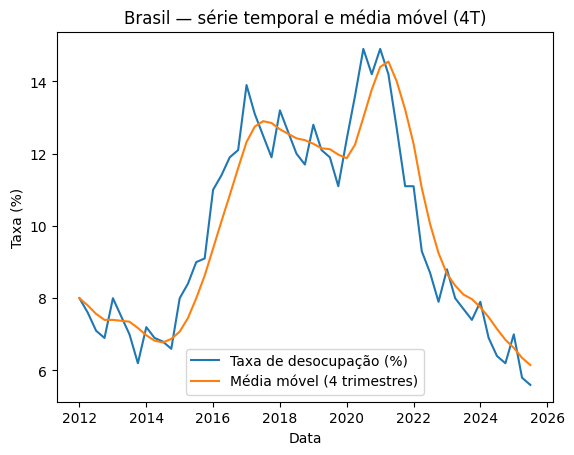

In [ ]:
# EDA — (3) Série temporal — Brasil (linha + média móvel 4T)
dfB_ord = dfB.sort_values("data").copy()
dfB_ord["mm_4tr"] = dfB_ord["valor"].rolling(4, min_periods=1).mean()

plt.figure()
plt.plot(dfB_ord["data"], dfB_ord["valor"], label="Taxa de desocupação (%)")
plt.plot(dfB_ord["data"], dfB_ord["mm_4tr"], label="Média móvel (4 trimestres)")
plt.title("Brasil — série temporal e média móvel (4T)")
plt.xlabel("Data")
plt.ylabel("Taxa (%)")
plt.legend()
plt.savefig("figura_2_brasil_mm4t.png", dpi=300, bbox_inches="tight")
plt.show()

**Figura 2 – Série temporal e média móvel de 4 trimestres (Brasil)**

**Sazonalidade — Boxplot por trimestre (Brasil)**

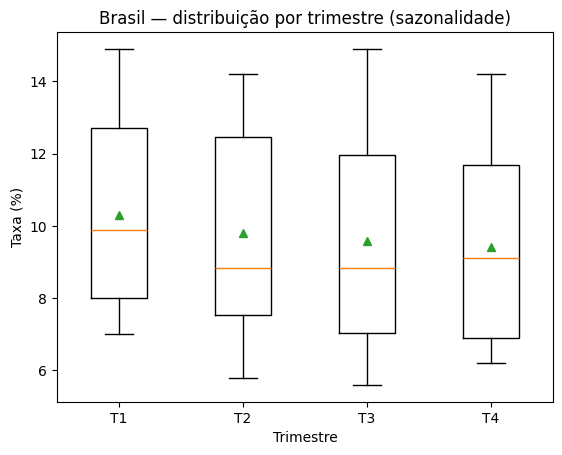

In [ ]:
if "trimestre" in dfB.columns:
    ordem = [1, 2, 3, 4]
    # Só usa trimestres que existem e têm dados
    trimestres_presentes = [t for t in ordem if (dfB["trimestre"] == t).any()]
    dados_box = [dfB.loc[dfB["trimestre"] == t, "valor"].dropna().values for t in trimestres_presentes]
    # Evita erro se algum trimestre vier vazio
    dados_box = [arr for arr in dados_box if arr.size > 0]
    if len(dados_box) == 0:
        print("Sem dados suficientes para boxplot por trimestre.")
    else:
        plt.figure()
        plt.boxplot(dados_box, tick_labels=[f"T{t}" for t in trimestres_presentes], showmeans=True)
        plt.title("Brasil — distribuição por trimestre (sazonalidade)")
        plt.xlabel("Trimestre"); plt.ylabel("Taxa (%)"); plt.show()
else:
    print("Coluna 'trimestre' ausente em dfB.")

**Figura 3 – Boxplot da taxa de desocupação por trimestre**

**UFs — estatísticas agregadas (média, mediana, desvio, n)**

In [ ]:
# EDA — (6) UFs — estatísticas agregadas
uf_stats = (dfU.groupby("local")["valor"]
              .agg(media="mean", mediana="median", desvio="std", n="count")
              .reset_index()
              .dropna(subset=["media"]))
print("UFs — estatísticas agregadas (amostra):")
display(uf_stats.head())

UFs — estatísticas agregadas (amostra):


,local,media,mediana,desvio,n
0,Acre,10.987273,9.8,3.307906,55
1,Alagoas,13.023636,11.7,3.745563,55
2,Amapá,13.836364,14.1,3.685978,55
3,Amazonas,11.672727,10.5,3.118015,55
4,Bahia,14.520000,14.4,3.580575,55


**UFs — Top 10 maiores médias (gráfico)**

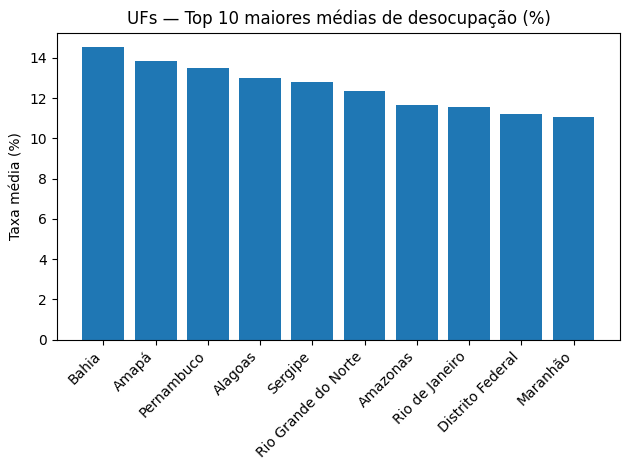

In [ ]:
top10_media = uf_stats.sort_values("media", ascending=False).head(10)
plt.figure()
plt.bar(top10_media["local"], top10_media["media"])
plt.title("UFs — Top 10 maiores médias de desocupação (%)")
plt.xticks(rotation=45, ha="right"); plt.ylabel("Taxa média (%)"); plt.tight_layout(); plt.show()

**Figura 4 – Médias da taxa de desocupação por UF**

**UFs — Top 10 maior volatilidade (desvio-padrão)**

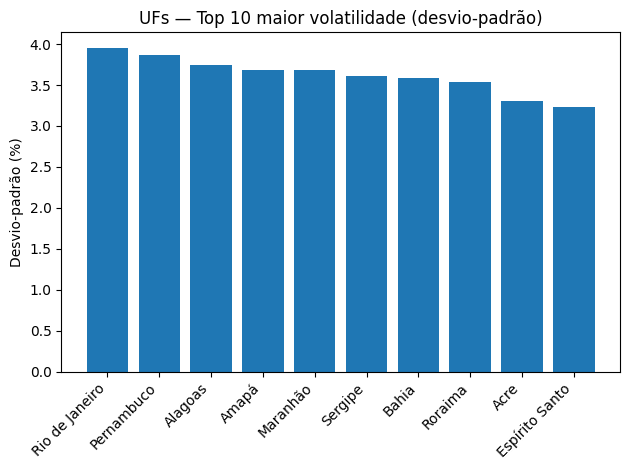

In [ ]:
top10_vol = uf_stats.sort_values("desvio", ascending=False).head(10)
plt.figure()
plt.bar(top10_vol["local"], top10_vol["desvio"])
plt.title("UFs — Top 10 maior volatilidade (desvio-padrão)")
plt.xticks(rotation=45, ha="right"); plt.ylabel("Desvio-padrão (%)"); plt.tight_layout(); plt.show()

**Série temporal de top 5 estados com maiores médias**

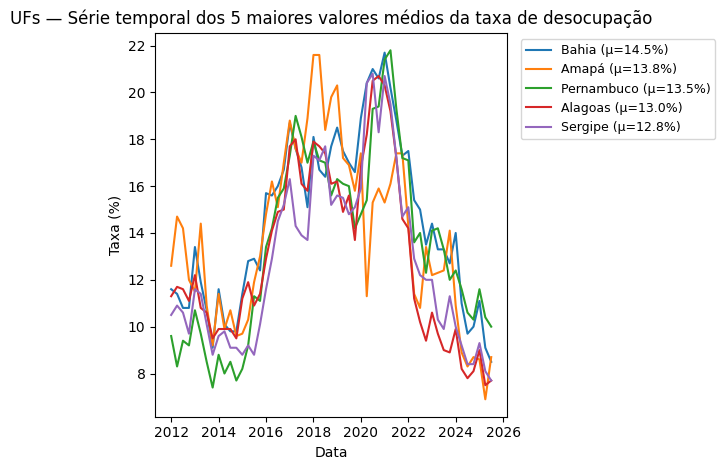

,media_%
local,
Bahia,14.52
Amapá,13.84
Pernambuco,13.50
Alagoas,13.02
Sergipe,12.78


In [ ]:
# Calcula médias por UF e seleciona top-5
uf_means = (dfU.groupby("local", as_index=False)["valor"]
              .mean()
              .dropna(subset=["valor"])
              .rename(columns={"valor": "media"}))

top5_locs = (uf_means.sort_values("media", ascending=False)
                        .head(5)["local"].tolist())

# Ordena as UFs selecionadas pela média (desc) para plotar em ordem consistente
ordem_top5 = (uf_means.set_index("local")
                        .loc[top5_locs, "media"]
                        .sort_values(ascending=False))

# Filtra dados das UFs top-5 e ordena por tempo
gdf = (dfU[dfU["local"].isin(ordem_top5.index)]
       .dropna(subset=["valor", "data"])
       .sort_values("data"))

plt.figure()
for uf in ordem_top5.index:
    s = gdf[gdf["local"] == uf]
    if s.empty:
        continue
    plt.plot(s["data"], s["valor"], label=f"{uf} (μ={s['valor'].mean():.1f}%)")

plt.title("UFs — Série temporal dos 5 maiores valores médios da taxa de desocupação")
plt.xlabel("Data")
plt.ylabel("Taxa (%)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=9)  # legenda fora para não poluir
plt.tight_layout()
plt.show()

# Tabela auxiliar das top-5 médias (para referência)
display(ordem_top5.rename("media_%").round(2).to_frame())

**Figura 5 – Trajetórias temporais das UFs com maior média**

**Comparação entre períodos — Brasil (pré-crise, crise, pandemia, recuperação)**

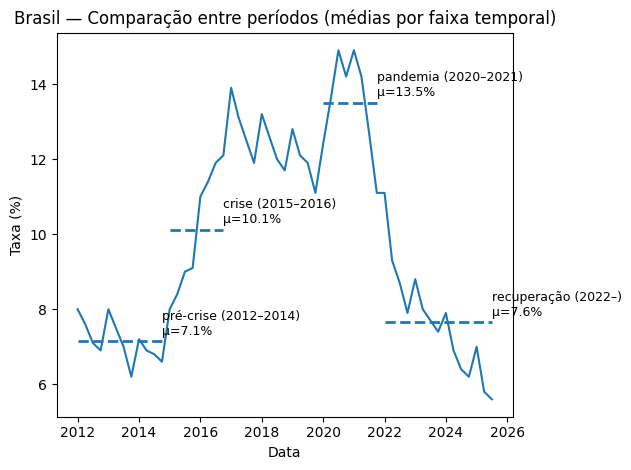

In [ ]:
# ===============================
# Gráfico temporal — Comparação entre períodos (Brasil)
# Pré-crise, Crise, Pandemia, Recuperação
# ===============================
import pandas as pd
import matplotlib.pyplot as plt

# Usa a base com qualidade, se existir; senão, a padronizada
dfB = globals().get("df_brasil")
if dfB is None:
    raise NameError("Não encontrei df_brasil. Execute as etapas anteriores.")

# Garantias mínimas
dfB = dfB.copy()
dfB["data"]  = pd.to_datetime(dfB["data"], errors="coerce")
dfB["valor"] = pd.to_numeric(dfB["valor"], errors="coerce")

# Garante 'periodo' como Period (Q-DEC)
if "periodo" not in dfB.columns:
    raise KeyError("Coluna 'periodo' ausente em dfB. Garanta a padronização temporal previamente.")
if not isinstance(getattr(dfB["periodo"], "dtype", None), pd.PeriodDtype):
    dfB["periodo"] = pd.PeriodIndex(dfB["periodo"].astype(str), freq="Q-DEC")

# Define períodos
def _p(y, q):  # Period trimestral
    return pd.Period(f"{y}Q{q}", freq="Q-DEC")

pmax = dfB["periodo"].max()
periodos = {
    "pré-crise (2012–2014)": (_p(2012,1), _p(2014,4)),
    "crise (2015–2016)":     (_p(2015,1), _p(2016,4)),
    "pandemia (2020–2021)":  (_p(2020,1), _p(2021,4)),
    "recuperação (2022–)":   (_p(2022,1), pmax),
}

# Série temporal
dfB_ord = dfB.sort_values("data")

plt.figure()
plt.plot(dfB_ord["data"], dfB_ord["valor"], label="Brasil — taxa de desocupação (%)")
plt.title("Brasil — Comparação entre períodos (médias por faixa temporal)")
plt.xlabel("Data"); plt.ylabel("Taxa (%)")

# Linhas horizontais de média por período, com rótulos
for nome, (ini, fim) in periodos.items():
    mask = (dfB_ord["periodo"] >= ini) & (dfB_ord["periodo"] <= fim)
    sub = dfB_ord.loc[mask, ["data", "valor"]].dropna()
    if sub.empty:
        continue
    ymean = sub["valor"].mean()
    x0, x1 = sub["data"].min(), sub["data"].max()

    # Segmento horizontal da média do período
    plt.hlines(ymean, xmin=x0, xmax=x1, linestyles="--", linewidth=2)

    yoff = (dfB_ord["valor"].max() - dfB_ord["valor"].min()) * 0.01
    plt.text(x1, ymean + yoff, f"{nome}\nμ={ymean:.1f}%", va="bottom", ha="left", fontsize=9)

plt.tight_layout()
plt.savefig("comparacao_entre_medias.png", dpi=300, bbox_inches="tight")
plt.show()

## Análise dos dados empregados: qualidade, estrutura, limitações e recortes adotados

Os dados foram padronizados e estruturados para garantir consistência temporal e comparabilidade entre períodos e regiões. O código do período foi convertido em colunas explícitas de ano, trimestre, período e data, permitindo ordenação cronológica correta e o uso de funções de janela e modelagem. Essa transformação é ilustrada na Figura 1 – Estruturação da série trimestral da taxa de desocupação, em que a base é organizada em formato longo, com as colunas principais local, ano, trimestre e valor, sem imputação de lacunas, preservando a integridade dos dados originais.

Os dados da PNAD Contínua (IBGE) apresentam alta qualidade e continuidade temporal, sem valores ausentes ou outliers relevantes. Figura 2 – Série temporal e média móvel de 4 trimestres da taxa de desocupação – Brasil, 2012–2025, evidencia uma trajetória coerente: aumento da desocupação na crise de 2015–2016, pico durante a pandemia (2020–2021) e queda gradual no período de recuperação (2022–2025), confirmando a plausibilidade econômica da série.

A análise da sazonalidade (ver Figura 3 – Boxplot da taxa de desocupação por trimestre) mostrou variações suaves entre trimestres, com médias próximas (T1 ≈ 10,3% e T4 ≈ 9,4%). O boxplot indica sazonalidade leve, sugerindo que a tendência de longo prazo é o principal componente da série. As disparidades regionais são evidenciadas nas figuras seguintes: a Figura 4 – Médias da taxa de desocupação por UF destaca Bahia, Amapá e Pernambuco como estados com maiores taxas médias (cerca de 13–15%), enquanto a Figura 5 – Trajetórias temporais das UFs com maior média mostra que Rio de Janeiro e Pernambuco apresentam maior volatilidade, refletindo instabilidade conjuntural e possível dependência de setores mais sensíveis ao ciclo econômico.

Foram adotadas simplificações metodológicas para manter o foco exploratório: análise apenas da taxa de desocupação agregada, sem desagregações por sexo, idade ou escolaridade, e uso de ferramentas descritivas e de decomposição (média móvel e STL) em vez de modelos paramétricos completos (como SARIMA). Essas escolhas, ilustradas ao longo das figuras de EDA, priorizam clareza interpretativa em detrimento de maior complexidade modelística.

Entre as limitações, destacam-se o erro amostral da PNAD (mais relevante em estados de menor população), a periodicidade trimestral (que suaviza choques muito rápidos) e a ausência de variáveis explicativas externas (como PIB, inflação ou políticas públicas específicas). Ainda assim, as evidências apresentadas nas figuras de EDA indicam que se trata de uma base robusta, pública e representativa, adequada para análises exploratórias do mercado de trabalho e para apoiar etapas posteriores de modelagem temporal e projeções alinhadas ao ODS 8.

# **Modelos**

## Seasonal-Trend decomposition using Loess

A decomposição da série temporal foi realizada utilizando o método STL (Seasonal-Trend Decomposition using Loess), aplicado à taxa trimestral de desocupação do Brasil (2012–2025). O STL permite decompor uma série temporal em três componentes fundamentais: tendência, sazonalidade e resíduo, fornecendo uma visão clara das variações estruturais e cíclicas do fenômeno ao longo do tempo. Foi adotado um período sazonal de 4 trimestres, correspondente à frequência anual.

O procedimento envolveu os seguintes passos:

1. Interpolação e regularização temporal: assegurou que os intervalos fossem
trimestrais e contínuos, condição necessária para o ajuste do modelo.

2. Aplicação do STL: separando a série original em componentes independentes — trend (tendência), season (sazonalidade) e resid (resíduo).

3. Construção da série ajustada sazonalmente: obtida subtraindo a componente sazonal do valor original (valor_aj_sazonal = valor - stl_season).

4. Visualização e validação: os gráficos compararam a série original e a ajustada, permitindo avaliar a influência e estabilidade das oscilações sazonais.

**Brasil — Decomposição STL + série ajustada sazonalmente**

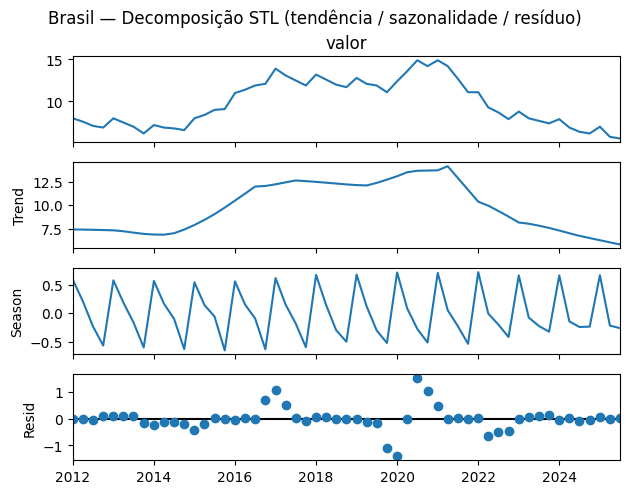

Componentes STL gravados em df_brasil: ['stl_trend', 'stl_season', 'valor_aj_sazonal']


,cod_local,local,cod_periodo,periodo_nome,valor,ano,trimestre,periodo,data,stl_trend_x,stl_season_x,valor_aj_sazonal_x,stl_trend_y,stl_season_y,valor_aj_sazonal_y,stl_trend,stl_season,valor_aj_sazonal
50,1,Brasil,202403,3º trimestre 2024,6.4,2024,3,2024Q3,2024-07-01,6.743915,-0.240994,6.640994,6.743915,-0.240994,6.640994,6.743915,-0.240994,6.640994
51,1,Brasil,202404,4º trimestre 2024,6.2,2024,4,2024Q4,2024-10-01,6.508425,-0.234984,6.434984,6.508425,-0.234984,6.434984,6.508425,-0.234984,6.434984
52,1,Brasil,202501,1º trimestre 2025,7.0,2025,1,2025Q1,2025-01-01,6.276982,0.664579,6.335421,6.276982,0.664579,6.335421,6.276982,0.664579,6.335421
53,1,Brasil,202502,2º trimestre 2025,5.8,2025,2,2025Q2,2025-04-01,6.049623,-0.216563,6.016563,6.049623,-0.216563,6.016563,6.049623,-0.216563,6.016563
54,1,Brasil,202503,3º trimestre 2025,5.6,2025,3,2025Q3,2025-07-01,5.825513,-0.261130,5.861130,5.825513,-0.261130,5.861130,5.825513,-0.261130,5.861130


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

dfB = globals().get("df_brasil_qc", globals().get("df_brasil"))
dfU = globals().get("df_uf_qc",     globals().get("df_uf"))

if dfB is None:
    raise NameError("Não encontrei df_brasil/df_brasil_qc. Execute as etapas anteriores.")


dfB = dfB.copy()
dfB["data"]  = pd.to_datetime(dfB.get("data", pd.NaT), errors="coerce")
dfB["valor"] = pd.to_numeric(dfB["valor"], errors="coerce")

SEASONAL_PERIOD = 4  # trimestral

# STL — (2) Brasil — Decomposição e ajuste sazonal
# Seleciona a série do Brasil (se 'local' existir)
if "local" in dfB.columns:
    sB = (dfB[dfB["local"].str.contains("Brasil", case=False, na=False)]
            .sort_values("data")
            .set_index("data")["valor"])
    if sB.empty:
        sB = dfB.sort_values("data").set_index("data")["valor"]
else:
    sB = dfB.sort_values("data").set_index("data")["valor"]

# Garante frequência regular trimestral para o input do STL
sB = sB.asfreq("QS")  # início de trimestre

sB_input = sB.interpolate(limit_direction="both")

stl = STL(sB_input, period=SEASONAL_PERIOD, robust=True)
res = stl.fit()

# Componentes
trend = pd.Series(res.trend, index=sB.index, name="stl_trend")
season = pd.Series(res.seasonal, index=sB.index, name="stl_season")
resid = pd.Series(res.resid, index=sB.index, name="stl_resid")

# Série ajustada sazonalmente: original - componente sazonal
s_aj = (sB - season).rename("valor_aj_sazonal")

# Plota decomposição (1 figura própria)
fig = res.plot()
fig.suptitle("Brasil — Decomposição STL (tendência / sazonalidade / resíduo)", y=1.02)
plt.savefig("brasil_decomposicao_stl.png", dpi=300, bbox_inches="tight")
plt.show()


target_name =  "df_brasil"
_target = globals().get(target_name).copy()

_target["data"] = pd.to_datetime(_target["data"], errors="coerce")
_target = _target.sort_values("data")

# Merge por data
_target = (_target.merge(trend.rename("stl_trend"), left_on="data", right_index=True, how="left")
                  .merge(season.rename("stl_season"), left_on="data", right_index=True, how="left")
                  .merge(s_aj, left_on="data", right_index=True, how="left"))

globals()[target_name] = _target  # atualiza no ambiente

print(f"Componentes STL gravados em {target_name}: ['stl_trend', 'stl_season', 'valor_aj_sazonal']")
display(_target.tail())

**Gráfico — Brasil: original × ajustado sazonalmente**

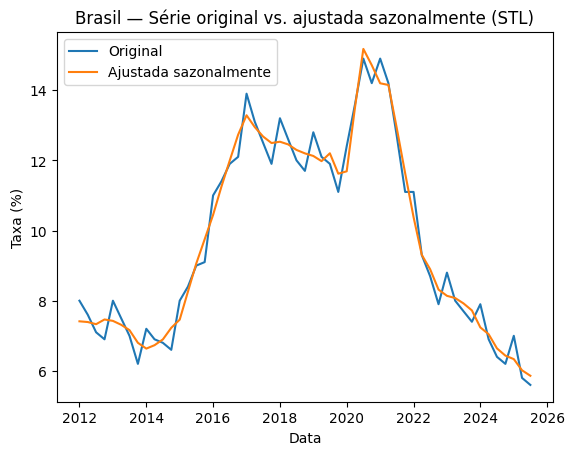

In [ ]:
# STL — (4) Gráfico — Brasil: original vs. ajustado sazonalmente
dfB_plot = globals().get("df_brasil").copy()
dfB_plot["data"] = pd.to_datetime(dfB_plot["data"], errors="coerce")
dfB_plot = dfB_plot.sort_values("data")

plt.figure()
plt.plot(dfB_plot["data"], dfB_plot["valor"], label="Original")
if "valor_aj_sazonal" in dfB_plot.columns:
    plt.plot(dfB_plot["data"], dfB_plot["valor_aj_sazonal"], label="Ajustada sazonalmente")
plt.title("Brasil — Série original vs. ajustada sazonalmente (STL)")
plt.xlabel("Data")
plt.ylabel("Taxa (%)")
plt.legend()
plt.savefig("brasil_serie_original_x_sazonal.png", dpi=300, bbox_inches="tight")
plt.show()

**Gráfico — componente sazonal do Brasil**

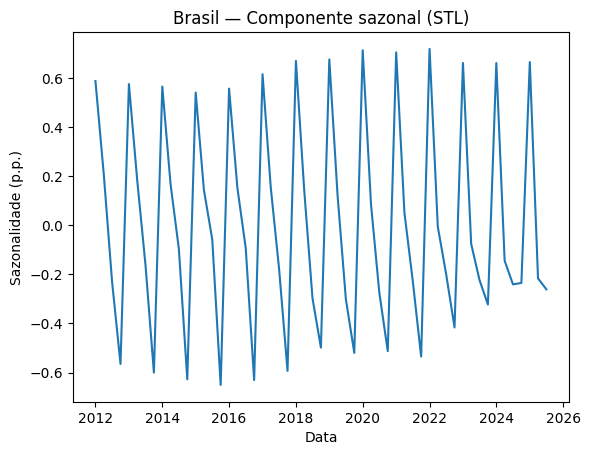

In [ ]:
dfB_comp = globals().get("df_brasil").copy()
dfB_comp["data"] = pd.to_datetime(dfB_comp["data"], errors="coerce")
dfB_comp = dfB_comp.sort_values("data")
plt.figure()
plt.plot(dfB_comp["data"], dfB_comp["stl_season"])
plt.title("Brasil — Componente sazonal (STL)")
plt.xlabel("Data")
plt.ylabel("Sazonalidade (p.p.)")
plt.savefig("brazil_componente_sazonal.png", dpi=300, bbox_inches="tight")
plt.show()


## ACF e PACF

O procedimento consistiu em:

1. Conversão e ordenação temporal: a coluna data foi transformada para o formato de data e a série ordenada cronologicamente.

2. Cálculo da ACF e PACF:

* A ACF (Autocorrelation Function) mede a correlação da série com suas defasagens (lags), indicando o quanto o valor atual depende de períodos anteriores.

* A PACF (Partial Autocorrelation Function) mostra o impacto direto de cada defasagem após remover a influência das intermediárias.

3. Comparação entre a série original e a ajustada sazonalmente: avaliou-se o comportamento antes e depois da remoção da sazonalidade, para verificar se os padrões de correlação mudam.

Os gráficos apresentam, no eixo x, as defasagens trimestrais (lags) e, no eixo y, os coeficientes de correlação entre -1 e 1. A faixa azul representa o **intervalo de confiança de 95%**.

**ACF e PACF — série original e ajustada sazonalmente**

<Figure size 640x480 with 0 Axes>

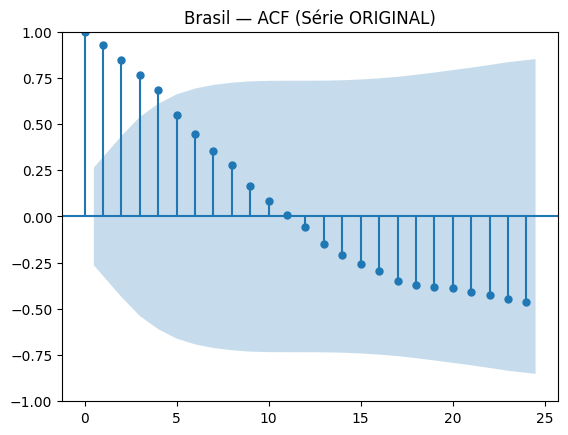

<Figure size 640x480 with 0 Axes>

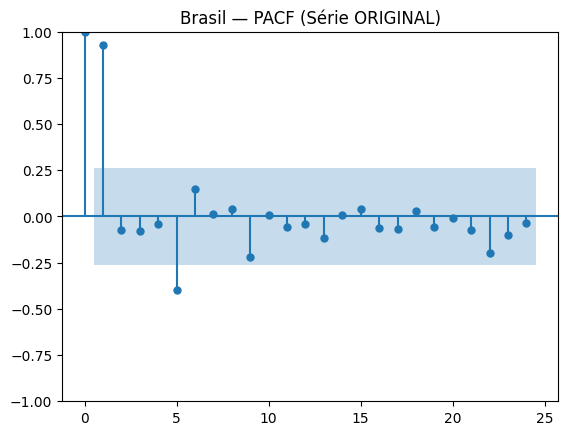

<Figure size 640x480 with 0 Axes>

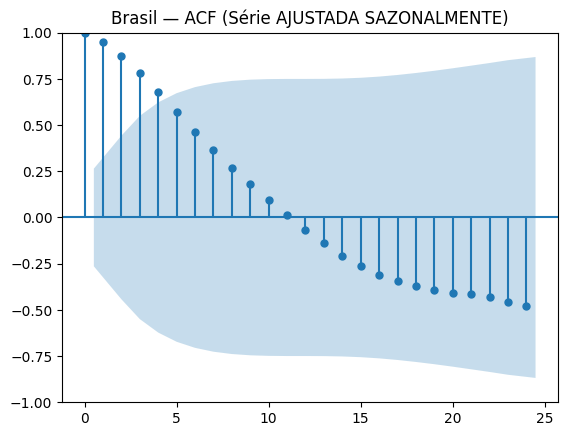

<Figure size 640x480 with 0 Axes>

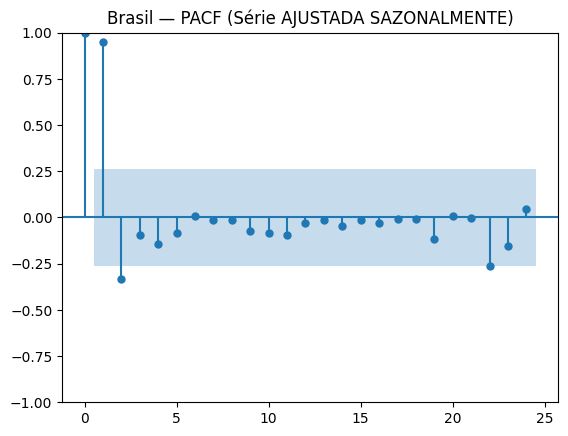

In [ ]:
# Comparação ACF/PACF — Série original vs. Ajustada sazonalmente (Brasil)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dfB = globals().get("df_brasil")
if dfB is None:
    raise NameError("Não encontrei df_brasil")

dfB = dfB.copy().sort_values("data")
dfB["data"]  = pd.to_datetime(dfB["data"], errors="coerce")
dfB["valor"] = pd.to_numeric(dfB["valor"], errors="coerce")

# Série ORIGINAL
s_orig = dfB["valor"].dropna()
lags_o = min(24, max(2, len(s_orig) - 2))

plt.figure()
plot_acf(s_orig, lags=lags_o, title="Brasil — ACF (Série ORIGINAL)")
plt.savefig("brazil_acf_original.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure()
plot_pacf(s_orig, lags=lags_o, method="ywm", title="Brasil — PACF (Série ORIGINAL)")
plt.savefig("brazil_pacf_original.png", dpi=300, bbox_inches="tight")
plt.show()

# Série AJUSTADA SAZONALMENTE

s_adj = dfB["valor_aj_sazonal"].dropna()
lags_a = min(24, max(2, len(s_adj) - 2))

plt.figure()
plot_acf(s_adj, lags=lags_a, title="Brasil — ACF (Série AJUSTADA SAZONALMENTE)")
plt.savefig("brazil_acf_ajustada.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure()
plot_pacf(s_adj, lags=lags_a, method="ywm", title="Brasil — PACF (Série AJUSTADA SAZONALMENTE)")
plt.savefig("brazil_pacf_ajustada.png", dpi=300, bbox_inches="tight")
plt.show()


## Comparação entre UFs

UF com MAIOR média: Bahia (14.52%)
UF com MENOR média: Santa Catarina (4.66%)


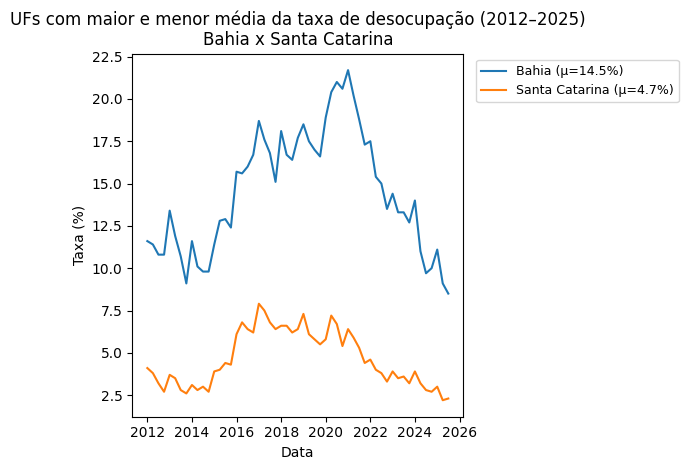

In [ ]:
# ===========================
# Séries da UF com MAIOR e MENOR média
# ===========================

# UF com maior média
uf_maior_row = uf_means.loc[uf_means["media"].idxmax()]
uf_maior = uf_maior_row["local"]
media_maior = uf_maior_row["media"]

# UF com menor média
uf_menor_row = uf_means.loc[uf_means["media"].idxmin()]
uf_menor = uf_menor_row["local"]
media_menor = uf_menor_row["media"]

print("UF com MAIOR média:", uf_maior, f"({media_maior:.2f}%)")
print("UF com MENOR média:", uf_menor, f"({media_menor:.2f}%)")

ufs_extremos = [uf_maior, uf_menor]

gdf = (
    dfU[dfU["local"].isin(ufs_extremos)]
       .dropna(subset=["valor", "data"])
       .sort_values("data")
)

plt.figure()
for uf in ufs_extremos:
    s = gdf[gdf["local"] == uf]
    if s.empty:
        continue
    plt.plot(
        s["data"],
        s["valor"],
        label=f"{uf} (μ={s['valor'].mean():.1f}%)"
    )

plt.title(f"UFs com maior e menor média da taxa de desocupação (2012–2025)\n{uf_maior} x {uf_menor}")
plt.xlabel("Data")
plt.ylabel("Taxa (%)")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=9)
plt.tight_layout()

# 🔹 aqui salva a imagem de forma simples
plt.savefig("ufs_maior_menor_media.png", dpi=300, bbox_inches="tight")

plt.show()

## Executando os modelos para as UFs com maiores e menores médias.

UF com MAIOR média de desocupação (2012–2025): Bahia
UF com MENOR média de desocupação (2012–2025): Santa Catarina


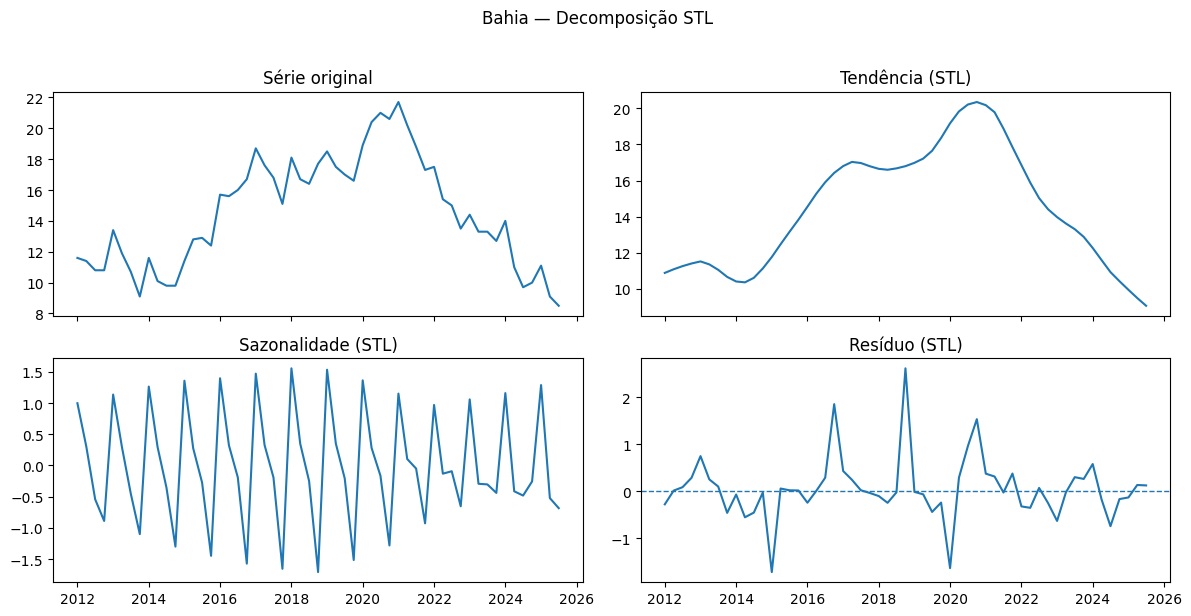

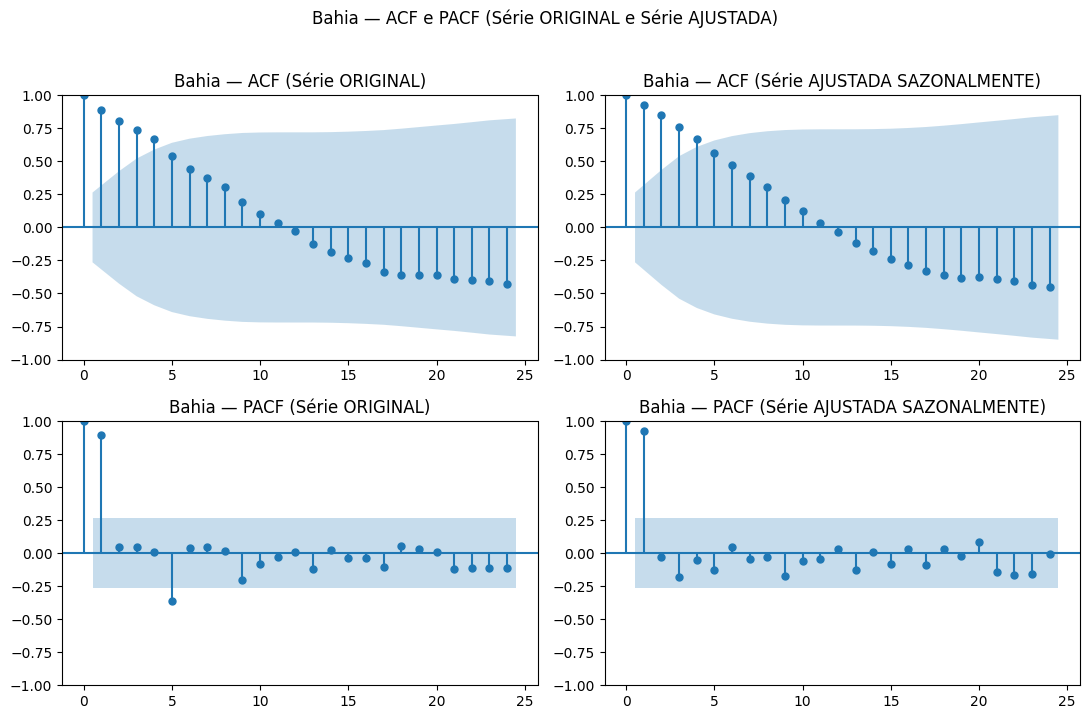

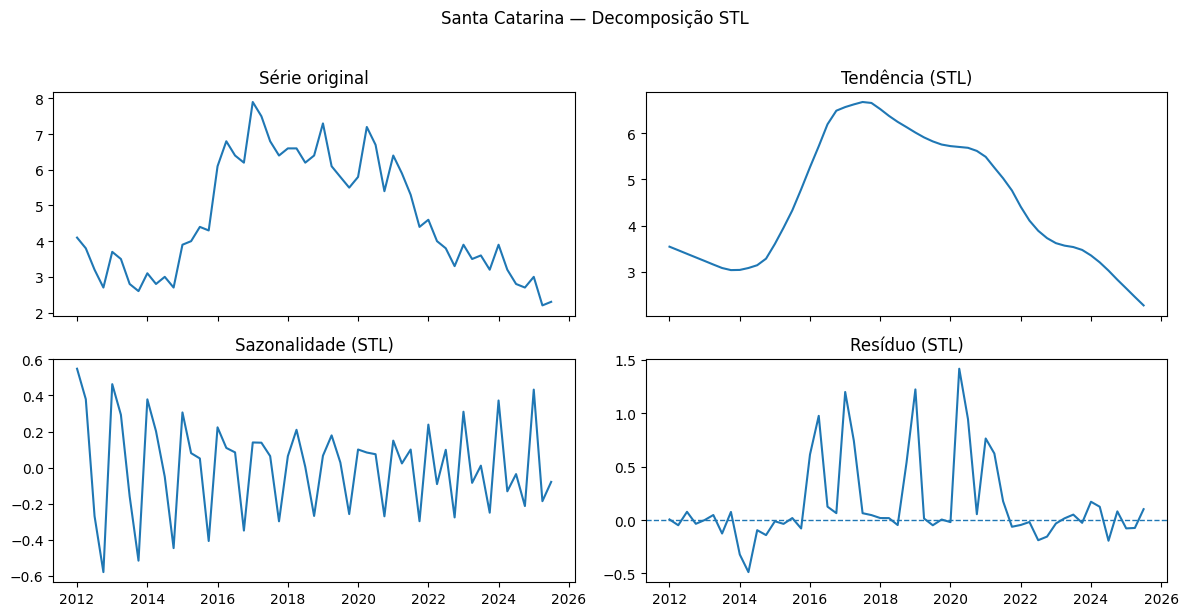

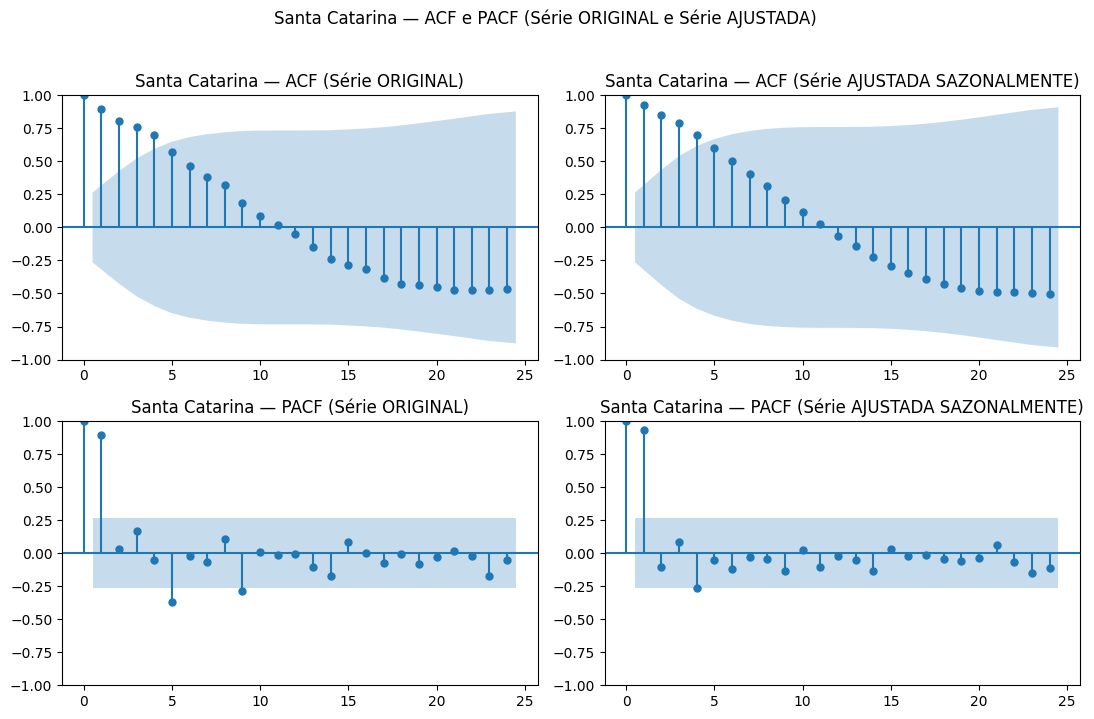

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ============================================================
# 1) Recupera o DataFrame base de UFs já padronizado
# ============================================================
dfU = globals().get("df_uf_qc", globals().get("df_uf"))
if dfU is None:
    raise NameError("Não encontrei df_uf/df_uf_qc. Execute as etapas anteriores.")

dfU = dfU.copy()
dfU["data"]  = pd.to_datetime(dfU.get("data", pd.NaT), errors="coerce")
dfU["valor"] = pd.to_numeric(dfU["valor"], errors="coerce")
dfU = dfU.dropna(subset=["valor", "data", "local"])

# ============================================================
# 2) Encontra UF com MAIOR e MENOR média de desocupação
# ============================================================
uf_means = (
    dfU.groupby("local", as_index=False)["valor"]
       .mean()
       .dropna(subset=["valor"])
       .rename(columns={"valor": "media"})
)

uf_maior = uf_means.sort_values("media", ascending=False).iloc[0]["local"]
uf_menor = uf_means.sort_values("media", ascending=True).iloc[0]["local"]

print("UF com MAIOR média de desocupação (2012–2025):", uf_maior)
print("UF com MENOR média de desocupação (2012–2025):", uf_menor)

# ============================================================
# 3) Função: STL + ACF/PACF para uma UF
# ============================================================
def stl_e_acf_pacf_uf(dfU, uf_nome, period=4, max_lag=24):
    # Filtra e ordena a série da UF
    dados_uf = (
        dfU[dfU["local"] == uf_nome]
        .dropna(subset=["valor", "data"])
        .sort_values("data")
    )

    serie = pd.Series(dados_uf["valor"].values, index=dados_uf["data"])

    # ---------------- STL ----------------
    stl = STL(serie, period=period, robust=True)
    res = stl.fit()
    serie_aj = serie - res.seasonal  # série ajustada sazonalmente

    # Guarda componentes em DataFrame
    out = dados_uf.copy()
    out["stl_trend"]        = res.trend
    out["stl_season"]       = res.seasonal
    out["stl_resid"]        = res.resid
    out["valor_aj_sazonal"] = serie_aj.values

    # --------- STL em 2x2 (dois gráficos por linha) ----------
    fig_stl, axes_stl = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
    fig_stl.suptitle(f"{uf_nome} — Decomposição STL", y=1.02)

    # Série original
    axes_stl[0, 0].plot(serie.index, serie.values)
    axes_stl[0, 0].set_title("Série original")

    # Tendência
    axes_stl[0, 1].plot(serie.index, res.trend)
    axes_stl[0, 1].set_title("Tendência (STL)")

    # Sazonalidade
    axes_stl[1, 0].plot(serie.index, res.seasonal)
    axes_stl[1, 0].set_title("Sazonalidade (STL)")

    # Resíduo
    axes_stl[1, 1].plot(serie.index, res.resid)
    axes_stl[1, 1].axhline(0, linestyle="--", linewidth=1)
    axes_stl[1, 1].set_title("Resíduo (STL)")

    plt.tight_layout()
    plt.savefig(f"{uf_nome}_stl.png", dpi=300, bbox_inches="tight")
    plt.show()

    # ---------------- Séries para ACF/PACF ----------------
    serie_aj_diff1 = serie_aj.diff().dropna()  # se quiser usar depois em ARIMA

    # ---------------- Plots ACF / PACF (2x2) ----------------
    fig, axes = plt.subplots(2, 2, figsize=(11, 7))
    fig.suptitle(f"{uf_nome} — ACF e PACF (Série ORIGINAL e Série AJUSTADA)", y=1.02)

    # Linha 1: ACF ORIGINAL x ACF AJUSTADA
    plot_acf(serie,    lags=max_lag, ax=axes[0, 0])
    axes[0, 0].set_title(f"{uf_nome} — ACF (Série ORIGINAL)")

    plot_acf(serie_aj, lags=max_lag, ax=axes[0, 1])
    axes[0, 1].set_title(f"{uf_nome} — ACF (Série AJUSTADA SAZONALMENTE)")

    # Linha 2: PACF ORIGINAL x PACF AJUSTADA
    plot_pacf(serie,    lags=max_lag, ax=axes[1, 0], method="ywm")
    axes[1, 0].set_title(f"{uf_nome} — PACF (Série ORIGINAL)")

    plot_pacf(serie_aj, lags=max_lag, ax=axes[1, 1], method="ywm")
    axes[1, 1].set_title(f"{uf_nome} — PACF (Série AJUSTADA SAZONALMENTE)")

    plt.tight_layout()
    plt.savefig(f"{uf_nome}_acf_pacf.png", dpi=300, bbox_inches="tight")
    plt.show()

    return out, res, serie_aj, serie_aj_diff1

# ============================================================
# 4) Rodando para UF com MAIOR e MENOR média
# ============================================================
df_stl_acf_maior, res_maior, serie_aj_maior, serie_aj_diff1_maior = stl_e_acf_pacf_uf(
    dfU, uf_maior, period=4, max_lag=24
)

df_stl_acf_menor, res_menor, serie_aj_menor, serie_aj_diff1_menor = stl_e_acf_pacf_uf(
    dfU, uf_menor, period=4, max_lag=24
)


# **Resultados**


## Brasil

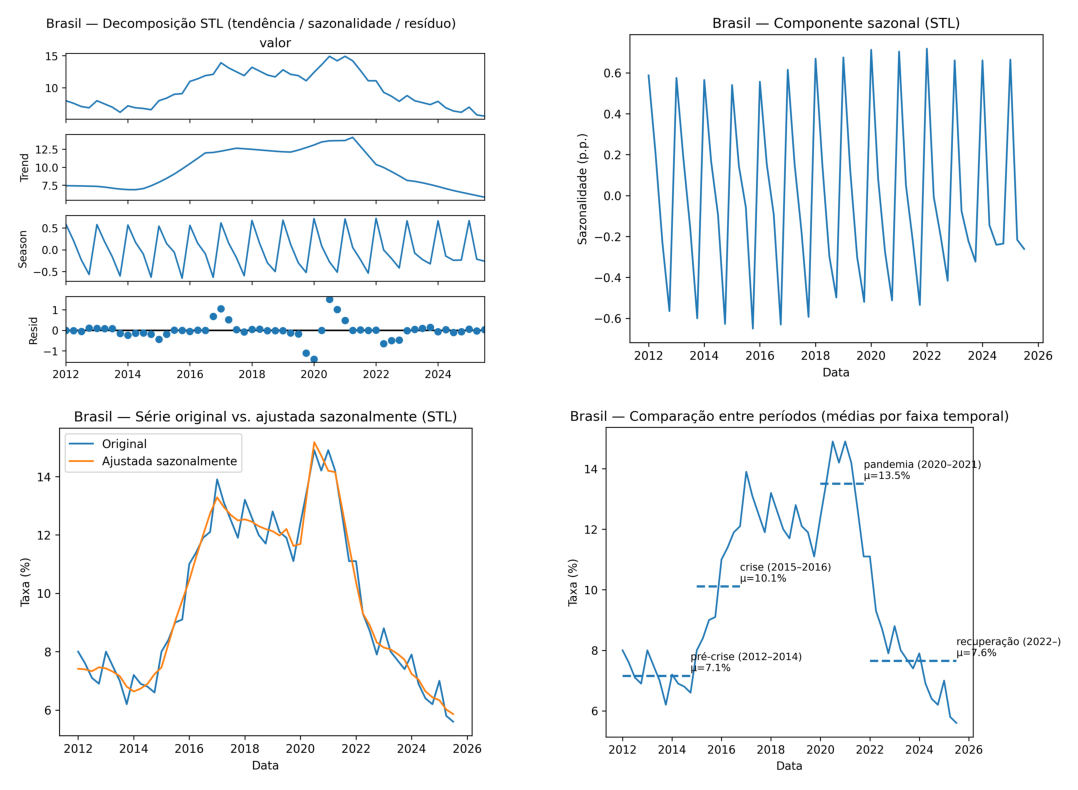

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread("brasil_decomposicao_stl.png")
img2 = mpimg.imread("brazil_componente_sazonal.png")
img3 = mpimg.imread("brasil_serie_original_x_sazonal.png")
img4 = mpimg.imread("comparacao_entre_medias.png")


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Linha 1
axes[0, 0].imshow(img1)
axes[0, 0].axis("off")

axes[0, 1].imshow(img2)
axes[0, 1].axis("off")

# Linha 2
axes[1, 0].imshow(img3)
axes[1, 0].axis("off")

axes[1, 1].imshow(img4)
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


### Diagnóstico STL (Brasil)

A decomposição revelou que a tendência (Trend) da taxa de desocupação no Brasil apresenta três fases bem definidas. No primeiro momento, de **crescimento (2014–2017)**, há um aumento contínuo da taxa, refletindo o impacto da crise econômica e política iniciada em 2015. Em seguida, observa-se uma fase de **estabilidade com leve queda (2018–2019)**, compatível com um período de recuperação moderada do mercado de trabalho. Por fim, ocorre um **novo pico e posterior queda (2020–2025)**, com forte elevação durante a pandemia de COVID-19, quando a taxa se aproxima de 15%, seguida de redução expressiva a partir de 2022, chegando a valores próximos de 6% em 2025.

Esse padrão é sintetizado no **gráfico de comparação entre períodos** (Brasil — Comparação entre períodos), que resume a trajetória em quatro regimes macroeconômicos: pré-crise (2012–2014), com média em torno de **7,1%**; crise (2015–2016), com média aproximada de **10,1%**; pandemia (2020–2021), com média em torno de **13,5%**; e recuperação (2022–), com média próxima de **7,6%**. Esses patamares médios destacam o salto no desemprego durante a crise e, principalmente, na pandemia, bem como a queda consistente na fase recente de recuperação.

A **componente sazonal (Season)** manteve um padrão regular de flutuação trimestral, com amplitude aproximada de **±0,6 ponto percentual**, o que indica **sazonalidade leve e estável**. Esse comportamento sugere que, embora existam variações sazonais típicas — como aumento no início do ano e redução no último trimestre —, o efeito é pequeno diante das mudanças estruturais na tendência.

O **resíduo (Resid)** mostrou dispersão concentrada em torno de zero, sem picos acentuados, indicando boa adequação do modelo e ausência de grandes choques fora dos já capturados pela tendência. Pequenas oscilações residuais em 2020–2021 estão associadas a impactos extraordinários da pandemia, mas não comprometem a estabilidade geral da decomposição.

Ao comparar as séries **original e ajustada sazonalmente**, observou-se que a linha ajustada é mais suave, eliminando variações periódicas e permitindo avaliar melhor a evolução estrutural do desemprego. Isso facilita a análise de políticas públicas e eventos macroeconômicos, uma vez que o comportamento ajustado reflete apenas movimentos de longo prazo, sem interferência das oscilações cíclicas.


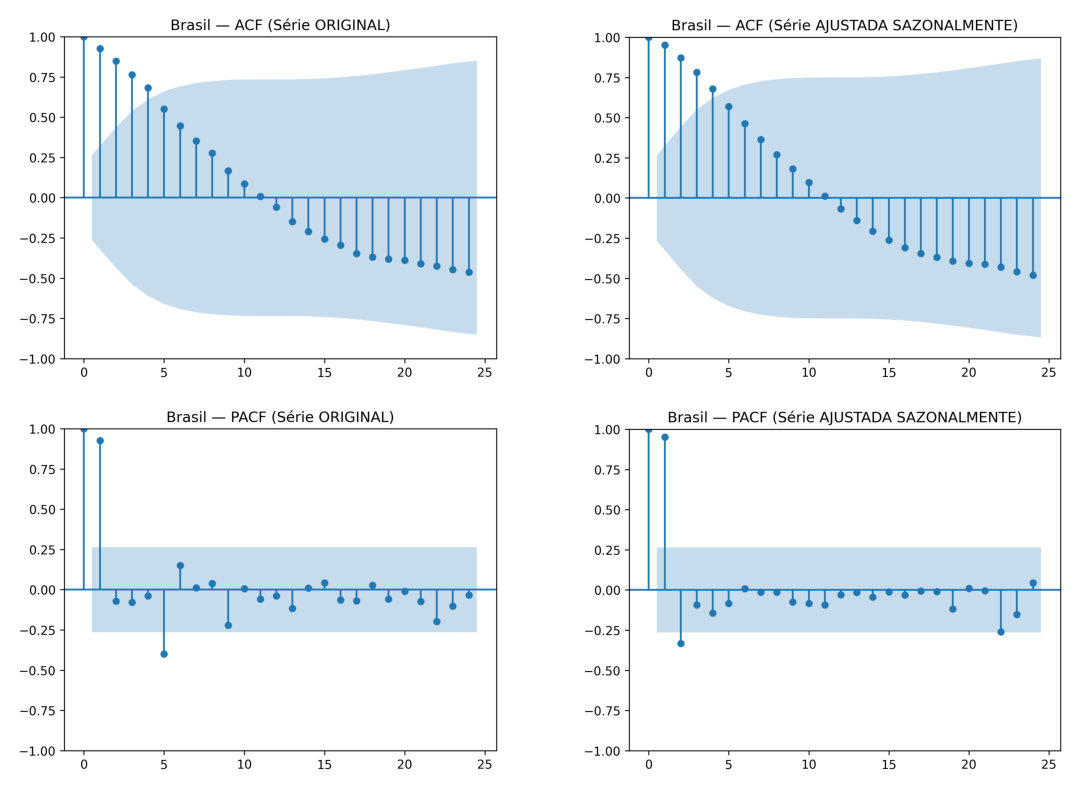

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread("brazil_acf_original.png")
img2 = mpimg.imread("brazil_acf_ajustada.png")
img3 = mpimg.imread("brazil_pacf_original.png")
img4 = mpimg.imread("brazil_pacf_ajustada.png")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Linha 1
axes[0, 0].imshow(img1)
axes[0, 0].axis("off")

axes[0, 1].imshow(img2)
axes[0, 1].axis("off")

# Linha 2
axes[1, 0].imshow(img3)
axes[1, 0].axis("off")

axes[1, 1].imshow(img4)
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

### Diagnóstico ACF/PACF (Brasil)

**Série original**

O gráfico da **ACF** da série original revela correlações muito elevadas nos primeiros lags (aproximadamente **0,9 no lag 1**) e um **decaimento lento e gradual** ao longo das defasagens. Esse padrão indica forte **persistência temporal**: o nível de desemprego em um trimestre está fortemente condicionado aos valores observados nos trimestres anteriores. Além disso, o fato de a autocorrelação permanecer positiva por vários lags antes de cruzar a linha zero sugere que a série **não é estacionária em nível**, sendo compatível com a presença de tendência ou raiz unitária.

A **PACF** da mesma série mostra um **pico expressivo e estatisticamente significativo apenas no lag 1**, enquanto os demais lags se mantêm próximos de zero e dentro da faixa de confiança. Esse comportamento é típico de um processo **autorregressivo de primeira ordem (AR(1))**, em que o valor corrente é fortemente explicado apenas pelo trimestre imediatamente anterior, e contribui para a escolha de modelos do tipo ARIMA com componente autorregressiva simples (por exemplo, ARIMA(1,1,0) após a diferenciação).

---

**Série ajustada sazonalmente**

Após a remoção da componente sazonal identificada pela decomposição STL, a **ACF da série ajustada sazonalmente** preserva o formato geral observado na série original, com correlações altas nos primeiros lags e decaimento progressivo. No entanto, nota-se uma **leve redução das autocorrelações em lags intermediários**, indicando que parte da estrutura de dependência estava associada ao padrão sazonal trimestral, agora isolado. Ainda assim, o comportamento confirma que a série ajustada continua exibindo **memória longa**, dominada por fatores estruturais (tendência e ciclos econômicos) e não apenas por sazonalidade.

Na **PACF da série ajustada**, o padrão se mantém: o lag 1 permanece como o único claramente significativo, enquanto os demais lags se distribuem em torno de zero. Isso reforça o diagnóstico de uma **estrutura autorregressiva simples**, em que um termo AR(1) é suficiente para capturar a dependência de curto prazo, tanto na série original quanto na série sem sazonalidade. Em conjunto, os gráficos de ACF e PACF sugerem que, uma vez tratadas a tendência e a sazonalidade, um modelo parcimonioso com componente AR(1) sobre a série diferenciada é uma especificação adequada para representar a dinâmica do desemprego brasileiro.



## Comparação entre maiores e menores médias - Bahia e Santa Catariana

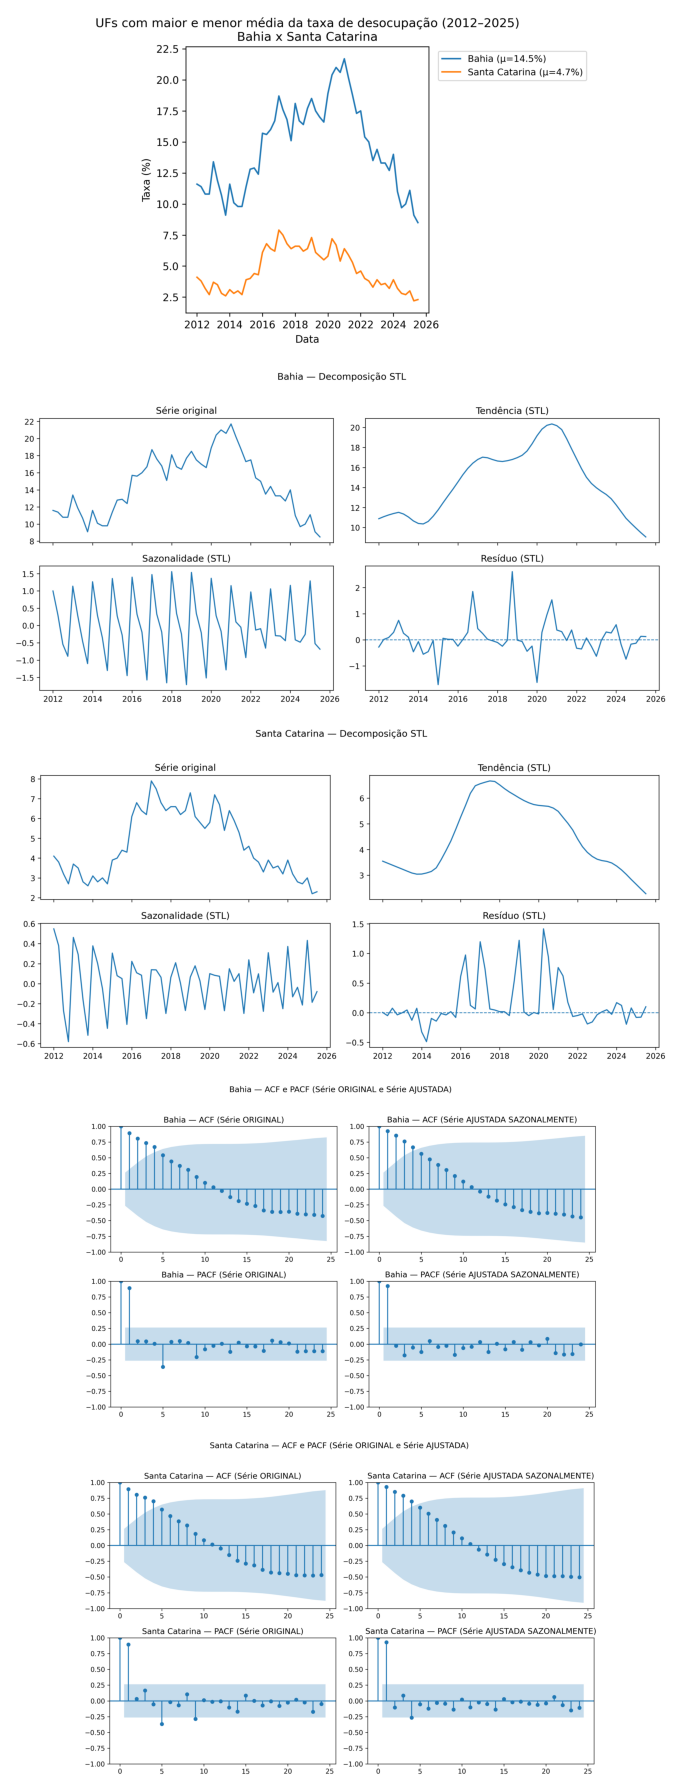

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread("ufs_maior_menor_media.png")
img2 = mpimg.imread("Bahia_stl.png")
img3 = mpimg.imread("Santa Catarina_stl.png")
img4 = mpimg.imread("Bahia_acf_pacf.png")
img5 = mpimg.imread("Santa Catarina_acf_pacf.png")

fig, axes = plt.subplots(5, 1, figsize=(22, 18))

axes[0].imshow(img1)
axes[0].axis("off")
axes[1].imshow(img2)
axes[1].axis("off")
axes[2].imshow(img3)
axes[2].axis("off")
axes[3].imshow(img4)
axes[3].axis("off")
axes[4].imshow(img5)
axes[4].axis("off")
plt.tight_layout()
plt.show()


### Diagnóstico

A comparação direta das séries trimestrais da Bahia e de Santa Catarina (Brasil — UFs com maior e menor média da taxa de desocupação, 2012–2025) evidencia um contraste acentuado de níveis e trajetórias. A Bahia apresenta uma taxa média em torno de **14,5%**, enquanto Santa Catarina gira em torno de **4,7%**, o que indica que, ao longo de todo o período, o desemprego baiano se manteve estruturalmente elevado, mais que o triplo do patamar catarinense na maior parte do tempo. Ambas as séries acompanham o ciclo macroeconômico nacional aumento na crise e na pandemia, queda na recuperação recente, mas partindo de “platôs” muito diferentes.

A decomposição STL da Bahia mostra uma **tendência** com forte elevação entre 2014 e 2019, atingindo picos superiores a 20% no período da pandemia, seguida de queda mais lenta a partir de 2021–2022. Isso sugere que choques negativos no mercado de trabalho baiano geram efeitos persistentes e demoram a ser revertidos. A **componente sazonal** apresenta amplitude relativamente alta (cerca de ±1,5 p.p.), com oscilações regulares entre trimestres, o que indica que a estrutura produtiva do estado é bastante sensível a variações sazonais possivelmente associadas a setores com forte rotatividade ou forte concentração de atividades em determinados períodos do ano. Os **resíduos** exibem picos relevantes em alguns trimestres, sinalizando choques idiossincráticos adicionais além do ciclo agregado.

Em Santa Catarina, a decomposição STL revela uma **tendência** muito mais moderada: mesmo nos momentos de maior estresse, a taxa de desocupação permanece em níveis relativamente baixos (próximos de 7–8%), com queda consistente após o auge da pandemia. A **sazonalidade** tem amplitude bem menor (cerca de ±0,5 p.p.), o que sugere que o mercado de trabalho catarinense sofre menos com flutuações de curto prazo e apresenta um padrão de contratação mais estável ao longo do ano. Os **resíduos** se mantêm, em geral, próximos de zero, com poucos desvios extremos, reforçando a leitura de maior estabilidade e resiliência.

Os gráficos de **ACF e PACF** para Santa Catarina confirmam a presença de **alta persistência temporal**: a autocorrelação é elevada nos primeiros lags e decai lentamente, indicando que choques na taxa de desocupação se propagam por vários trimestres. A PACF apresenta um pico dominante no primeiro lag, com os demais coeficientes próximos de zero, padrão característico de um processo **autorregressivo de primeira ordem (AR(1))**. Em conjunto com os resultados obtidos para a Bahia, isso sugere que, do ponto de vista da dinâmica temporal, ambos os estados podem ser descritos por estruturas AR(1), mas com diferenças marcantes em **nível**, **amplitude sazonal** e **volatilidade residual**.

Em síntese, a análise conjunta dos gráficos de série temporal, decomposição STL e ACF/PACF mostra que Bahia e Santa Catarina compartilham o mesmo “formato” de ciclo (crise–pandemia–recuperação), porém inseridos em realidades muito distintas: a Bahia combina **desemprego estruturalmente alto, sazonalidade forte e maior exposição a choques**, enquanto Santa Catarina apresenta **níveis baixos, sazonalidade moderada e rápida absorção de distúrbios**. Essa assimetria reforça a importância de políticas de emprego com foco regional, especialmente em estados com maior vulnerabilidade estrutural.


# **Dicussão e Conclusão**


Os resultados obtidos mostram que a trajetória da taxa de desocupação no Brasil entre 2012 e 2025 está fortemente alinhada aos grandes ciclos macroeconômicos do período: pré-crise, crise de 2015–2016, choque da pandemia de COVID-19 e fase de recuperação recente. A decomposição STL evidenciou uma tendência de alta até o auge da pandemia, seguida de queda consistente a partir de 2022, o que é coerente com a redução histórica da taxa de desocupação observada em 2024–2025. A sazonalidade se mostrou leve e estável, indicando que o comportamento do desemprego é dominado por fatores estruturais, e não apenas por flutuações de curto prazo. Em termos de ODS 8, esse resultado sugere que o país vem avançando em direção ao objetivo de “trabalho decente e crescimento econômico”, mas ainda de forma desigual e vulnerável a choques externos.

A comparação entre Bahia (maior média de desocupação) e Santa Catarina (menor média) reforça o caráter estrutural das assimetrias regionais do mercado de trabalho brasileiro. Enquanto a Bahia apresenta um nível médio em torno de 14,5%, com picos superiores a 20% e sazonalidade mais intensa, Santa Catarina mantém taxas em torno de 4,7%, com flutuações mais moderadas e rápida recuperação após choques. As decomposições STL de ambos os estados mostram um ciclo qualitativo semelhante (alta na crise e na pandemia, queda na recuperação), porém em patamares muito distintos. Os gráficos de ACF e PACF indicam forte persistência temporal e estrutura autorregressiva de primeira ordem (AR(1)) em ambos os casos, o que significa que choques negativos tendem a se propagar ao longo de vários trimestres. Na prática, isso implica que estados com níveis iniciais mais altos, como a Bahia, tendem a levar mais tempo para retornar a patamares mais baixos de desemprego, ampliando desigualdades regionais e tensionando o cumprimento do ODS 8 em todo o território nacional.

Do ponto de vista de política pública, as evidências sugerem que **não basta uma estratégia macro uniforme**. Em estados com baixa desocupação e maior resiliência, como Santa Catarina, o foco pode estar na qualificação profissional contínua, na transição para empregos de maior produtividade e na formalização de vínculos, reforçando a dimensão “trabalho decente” do ODS 8. Já em estados com desemprego estrutural elevado, como a Bahia, é necessário combinar políticas de estímulo à atividade econômica (infraestrutura, incentivos setoriais, atração de investimentos) com políticas ativas de emprego (programas de intermediação de mão de obra, subsídios temporários à contratação, qualificação focada em setores dinâmicos locais). A sazonalidade mais intensa na Bahia sugere espaço para políticas específicas em períodos críticos do ano, como programas temporários, frentes de trabalho ou reforço de benefícios de proteção social nos trimestres em que a taxa sobe.

A persistência temporal identificada pelos gráficos de ACF/PACF também tem implicações importantes. Como a taxa de desocupação apresenta forte memória, políticas de curto prazo tendem a ter efeitos limitados se não forem mantidas ou complementadas por ações estruturais de médio e longo prazo. Isso vale tanto para as respostas à crise (como durante a pandemia) quanto para a consolidação da recuperação. A presença de um comportamento compatível com modelos AR(1) indica que, uma vez iniciado um ciclo de redução do desemprego, é fundamental evitar interrupções abruptas em políticas de geração de emprego, sob risco de “reverter” avanços e prolongar períodos de desocupação elevada, especialmente em regiões mais vulneráveis.

### Conclusão e recomendações para o poder público

Os resultados deste estudo, obtidos por meio de EDA, decomposição STL e análise ACF/PACF, mostram que a taxa de desocupação no Brasil avançou em direção às metas do ODS 8, principalmente a partir de 2022, mas ainda apresenta **marcantes desigualdades regionais e forte inércia temporal**. As séries da Bahia e de Santa Catarina ilustram dois extremos de um mesmo sistema: enquanto uma parte do país vive o desafio do desemprego estrutural, outra opera próxima de pleno emprego, ainda que sujeita a choques conjunturais. Isso exige políticas públicas territorializadas, baseadas em evidências e monitoradas continuamente.

Com base nos diferentes períodos analisados, algumas recomendações são:

- **Período pré-crise (2012–2014)**  
  Utilizar ferramentas de decomposição e acompanhamento de séries (como STL e médias móveis) para construir **painéis de monitoramento antecipado**. Mesmo em fases de relativa estabilidade, é possível detectar mudanças sutis na tendência que indiquem deterioração futura do mercado de trabalho, permitindo que medidas anticíclicas sejam desenhadas antes da materialização de uma crise.

- **Crise de 2015–2016**  
  Empregar modelos de séries temporais (ARIMA/AR(1) sobre série diferenciada) para simular cenários alternativos de desemprego sob diferentes pacotes de políticas (investimento público, redução de tributos setoriais, programas de emprego). Essas simulações podem apoiar decisões sobre **intensidade e duração** das políticas de estímulo, ajudando a encurtar o período de alta desocupação.

- **Pandemia de COVID-19 (2020–2021)**  
  Em contextos de choque abrupto, o uso de séries ajustadas sazonalmente e de indicadores em tempo quase real permite avaliar com mais clareza o impacto de medidas emergenciais (auxílios, manutenção de renda, programas de preservação de empregos). A análise residual e de quebras estruturais pode ajudar o poder público a distinguir o que é efeito transitório da crise e o que se torna uma nova tendência, orientando a transição de políticas emergenciais para políticas estruturais.

- **Período de recuperação (2022–2025)**  
  Ferramentas como STL, ACF/PACF e dashboards com séries regionais permitem acompanhar se a recuperação está sendo **inclusiva** ou concentrada em poucos estados. Nos casos em que a tendência de queda do desemprego é lenta (como na Bahia), os indicadores servem de alerta para a necessidade de reforçar políticas de emprego e desenvolvimento produtivo local, evitando que a recuperação nacional oculte bolsões persistentes de vulnerabilidade.

Quanto ao uso da ferramenta analítica, o notebook desenvolvido neste projeto pode ser facilmente adaptado para um ambiente institucional (por exemplo, uma secretaria de trabalho ou um observatório de políticas públicas). Ele já organiza a coleta automatizada de dados (SIDRA/IBGE), padroniza séries, gera gráficos de tendência, sazonalidade, comparação regional e diagnósticos ACF/PACF. Em formato de painel interativo ou rotinas periódicas de análise, esse tipo de solução permite ao poder público:

- **Monitorar continuamente** a taxa de desocupação por UF, região e faixas de tempo;
- **Detectar rapidamente mudanças** na tendência ou na volatilidade do desemprego;
- **Comparar estados extremos** (como Bahia e Santa Catarina) para calibrar políticas específicas;
- **Avaliar o impacto de políticas** ao observar como a tendência e a componente residual evoluem após intervenções.

Em suma, a combinação de dados oficiais (PNAD Contínua) com técnicas de séries temporais fornece uma base sólida para decisões alinhadas ao ODS 8. Ela permite que gestores públicos saiam de uma visão puramente descritiva e passem a trabalhar com **evidências dinâmicas**, capazes de orientar a formulação, o monitoramento e a correção de políticas de emprego em tempo hábil, com foco na redução das desigualdades regionais e na promoção de trabalho decente para toda a população brasileira.


# Melhorias futuras

Embora os resultados obtidos com EDA, decomposição STL e análise ACF/PACF tenham se mostrado consistentes e informativos, há diversas possibilidades de aprimoramento metodológico para trabalhos futuros:

- **Incorporação de modelos não lineares e redes neurais**  
  Explorar arquiteturas de aprendizado profundo para séries temporais, como redes recorrentes (RNN), LSTM/GRU ou modelos baseados em *Transformers*, capazes de capturar relações não lineares e padrões de longo alcance na dinâmica do desemprego. Esses modelos poderiam ser comparados a especificações ARIMA tradicionais em termos de capacidade preditiva e robustez a choques.

- **Maior cruzamento com variáveis de contexto macroeconômico e social**  
  Integrar ao modelo variáveis explicativas como PIB, inflação, massa salarial, nível de formalização, indicadores de políticas públicas (por exemplo, gasto social ou programas de emprego) e choques setoriais. Essa abordagem, via modelos ARIMAX, VAR ou redes neurais multivariadas, permitiria avaliar explicitamente como fatores de contexto influenciam a taxa de desocupação e fortaleceria a capacidade de simulação de cenários de política econômica.

- **Análise desagregada por grupos populacionais**  
  Estender a análise para recortes por sexo, faixa etária, escolaridade ou cor/raça, utilizando os microdados da PNAD Contínua. Isso permitiria investigar se a dinâmica temporal e a resposta a choques (crise, pandemia, recuperação) são homogêneas entre grupos ou se determinados segmentos sofrem desemprego mais persistente, o que é relevante para o ODS 8 na perspectiva de “não deixar ninguém para trás”.

- **Modelos hierárquicos e espaciais para as UFs**  
  Empregar modelos hierárquicos bayesianos ou modelos de espaço de estado multirregionais que permitam compartilhar informação entre UFs, levando em conta correlações espaciais e similaridades estruturais. Isso pode melhorar estimativas em estados com amostras menores e possibilitar inferências mais precisas sobre padrões regionais de desemprego.

- **Integração com painéis de monitoramento em tempo quase real**  
  Automatizar o fluxo de coleta, atualização e previsão em um *dashboard* interativo (por exemplo, em Python/R + ferramentas de visualização) que permita ao poder público acompanhar, em tempo quase real, a evolução do desemprego e de cenários projetados. Isso fortaleceria o uso da ferramenta como suporte operacional contínuo para políticas alinhadas ao ODS 8.


# Apresentação

link para video

# **Referências**

BARROS, R.; CORSEUIL, C. Desemprego e dinâmica do mercado de trabalho no Brasil. Revista Brasileira de Economia, v. 75, n. 3, p. 321-345, 2021.

BOX, G. E. P.; JENKINS, G. M.; REINSEL, G. C.; LJUNG, G. M. Time Series Analysis: Forecasting and Control. 5. ed. Hoboken: John Wiley & Sons, 2016.

CARVALHO, M.; MOREIRA, P. Previsão da taxa de desocupação brasileira com modelos ARIMA. Economia Aplicada, v. 24, n. 2, p. 245-266, 2020.

CHATFIELD, C. The Analysis of Time Series: An Introduction. 6. ed. Boca Raton: Chapman & Hall/CRC, 2003.

CLEVELAND, R. B.; CLEVELAND, W. S.; MCRAE, J. E.; TERPENNING, I. STL: A Seasonal-Trend Decomposition Procedure Based on Loess. Journal of Official Statistics, v. 6, n. 1, p. 3–73, 1990.

FIRPO, S.; GONZAGA, G.; MONTEIRO, J. Crises econômicas e mercado de trabalho no Brasil. Estudos Econômicos, v. 52, n. 1, p. 5-30, 2022.

HARVEY, A. C. Forecasting, Structural Time Series Models and the Kalman Filter. Cambridge: Cambridge University Press, 1990.

HYNDMAN, R. J.; ATHANASOPOULOS, G. Forecasting: Principles and Practice. 2. ed. Melbourne: OTexts, 2018.

IBGE. Pesquisa Nacional por Amostra de Domicílios Contínua – Notas metodológicas. Rio de Janeiro, 2024.

ILO. World Employment and Social Outlook: Trends 2023. Genebra: International Labour Office, 2023.

NAÇÕES UNIDAS. ODS 8: Trabalho decente e crescimento econômico. 2023. Disponível em: https://brasil.un.org/pt-br/sdgs/8.

SANTOS, L.; PORSSE, A. Previsão do desemprego regional com aprendizado de máquina. Revista de Economia Aplicada, v. 26, n. 1, p. 89-112, 2022.

SILVA, J.; PORSSE, A. Modelos de espaço de estado para séries de desemprego. Estudos Econômicos, v. 51, n. 4, p. 753-780, 2021.


# **Apresentação**

Colocar os links dos vídeos.

In [ ]:
#@title **Avaliação**
Metodologia = 10 #@param {type:"slider", min:0, max:10, step:1}

Resultado = 10 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 10 #@param {type:"slider", min:0, max:10, step:1}

Artigo = 10 #@param {type:"slider", min:0, max:10, step:1}

Apresentacao = 10 #@param {type:"slider", min:0, max:10, step:1}

In [ ]:
#@title **Nota Final**
nota = 0.25*Metodologia + 0.15*Resultado + 0.10*Conclusao + 0.25*Artigo + 0.25*Apresentacao

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0



,nome,nota
0,Aluno 1,10.0
1,Aluno 2,10.0
2,Aluno 3,10.0
3,Aluno 4,10.0
4,Aluno 5,10.0
